# The linearized instability

We are still looking at the two stream instability investigated in [Hawke, Andersson and Comer (2013)](http://dx.doi.org/10.1088/0264-9381/30/14/145007) - see the paper and `Figure1.ipynb` for details. Here we animate the growth of the instability in spacetime: this is an animation of Figures 3 and 4 (linearized solution only) from the paper. The results will not be identical because of the random floating point seeds.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
plt.rcParams.update({'font.size': 14, 'font.family': 'serif'})

## Stable solution

In [4]:
import EOS
import compute_perturbation as mf

# EOS options.
options_stable = dict([('EOS_Derivatives', EOS.EOS_Paper), \
                       ('kappa', [0.5, 0.5])             , \
                       ('kappa_12', 0.0)                 , \
                       ('kappa_delta', 0.5)              , \
                       ('gamma', [1.6, 1.8])             , \
                       ('m', [1.0, 1.0])                 , \
                       ('sigma', [0.0, 0.0])])

# Domain
options_stable['L'] = 1.0
options_stable['a_max'] = 9 # Very few modes are needed as nothing much happens

# Background
rho_bg = 1.0
v_bg1  = 0.1
W_bg1  = 1.0
v_bg2  = 0.0
W_bg2  = 1.0 / np.sqrt(1.0 - v_bg2**2)
options_stable['n_bg'] = np.array([[rho_bg * W_bg1,  rho_bg * W_bg1 * v_bg1], \
                                   [rho_bg * W_bg2,  rho_bg * W_bg2 * v_bg2]])

# Perturbation - single sine wave
d_n = 1.0e-6
delta_nhat = np.zeros((options_stable['a_max'], 2, 2), complex)
delta_nhat[1, 0, 0] = -0.5 * 1j * W_bg1 * d_n
delta_nhat[1, 0, 1] = -0.5 * 1j * W_bg1 * v_bg1 * d_n
# This part adds adjusted floating point noise.
# To be honest, the precise form of the noise is just due to how it was left after 
# I'd tried to fix a number of different errors; any noise should do.
for a in range(1,options_stable['a_max']):
    omega_adj = np.pi * float(a) / (options_stable['L'] * float(options_stable['a_max']))
    adjustment = (8.0 * np.sin(omega_adj) - np.sin(2.0 * omega_adj)) / 6.0
    delta_nhat[a, :, :] += 5e-19 * 1j * adjustment / a
options_stable['delta_nhat'] = delta_nhat

# Now set up the spacetime domain
x = np.linspace(-options_stable['L'], options_stable['L'])
t_stable = np.linspace(0.0, 1.0, 51)

# Compute the linearized solution
delta_n_stable = mf.calc_delta_n(t_stable, x, options_stable)

Animate the solution

[[<matplotlib.lines.Line2D object at 0x1069c90b8>], [<matplotlib.lines.Line2D object at 0x1069c4780>], [<matplotlib.lines.Line2D object at 0x1069b7f28>], [<matplotlib.lines.Line2D object at 0x10697dd30>]]
<class 'list'>



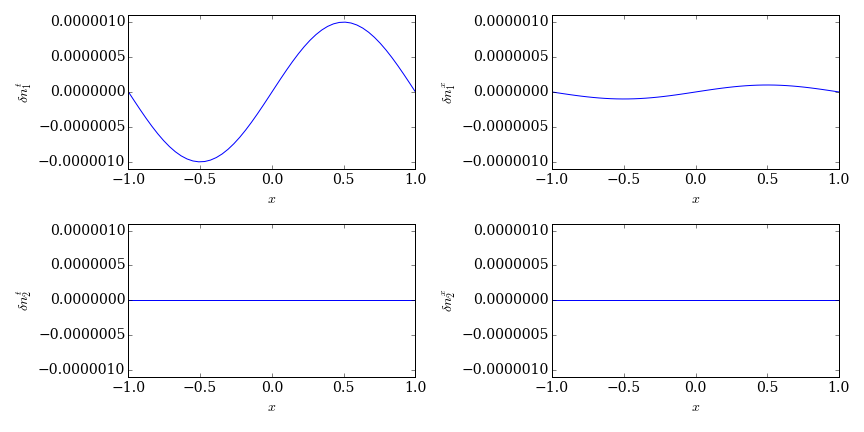
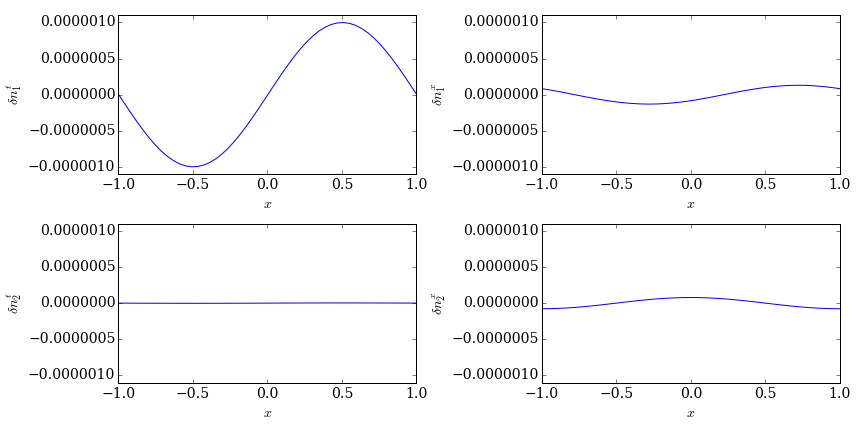
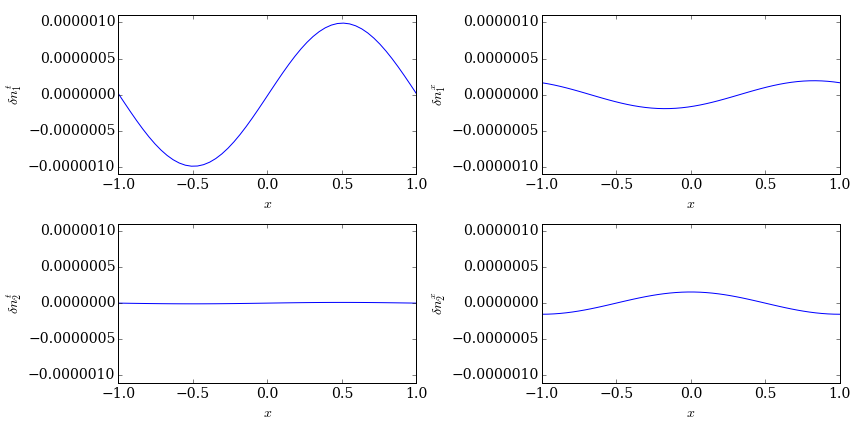
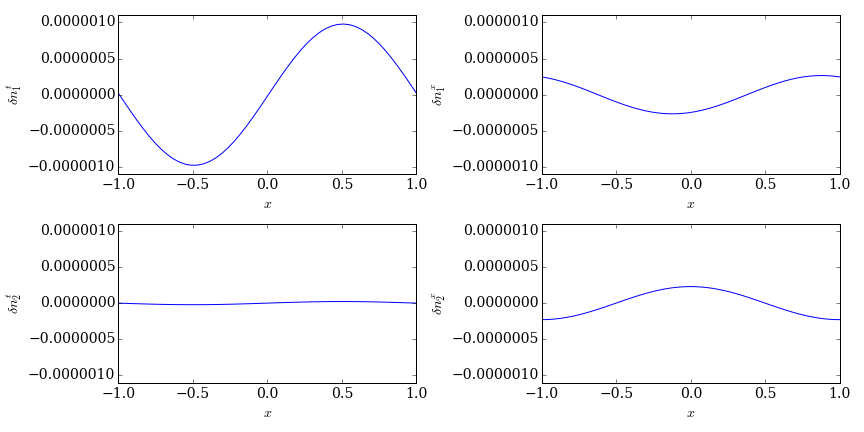
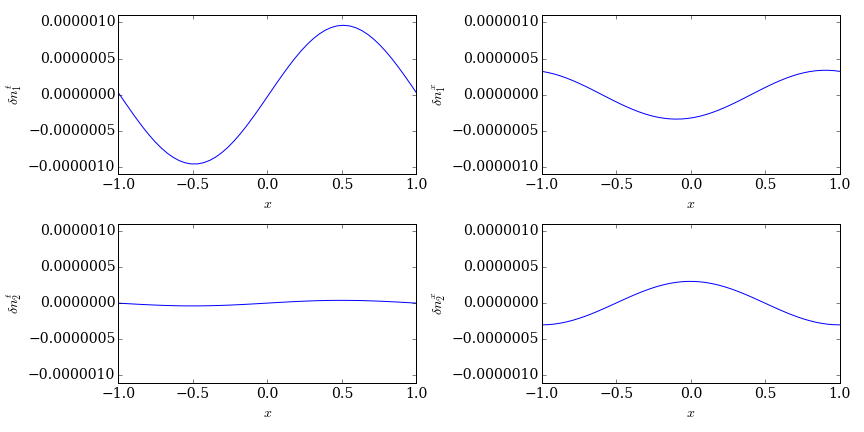
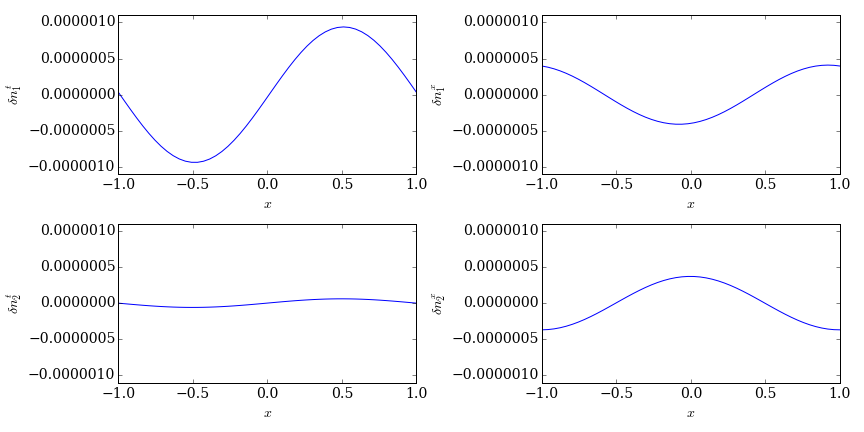
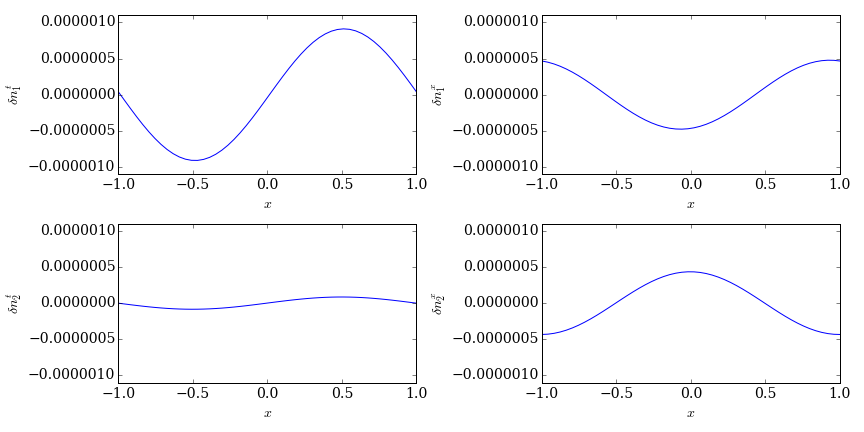
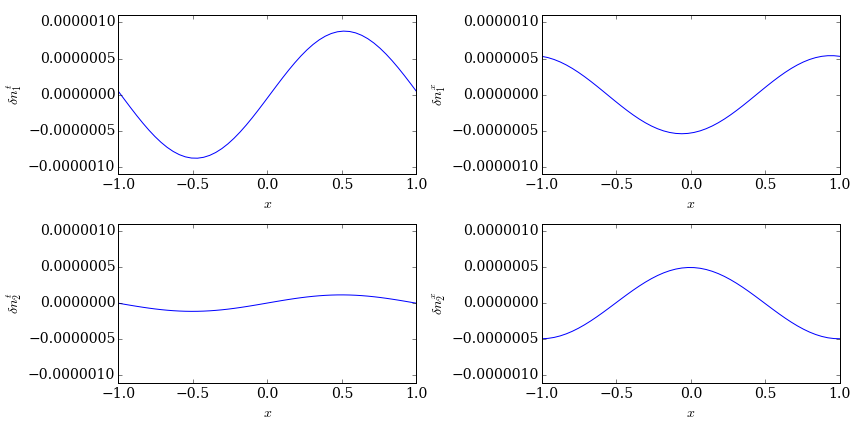
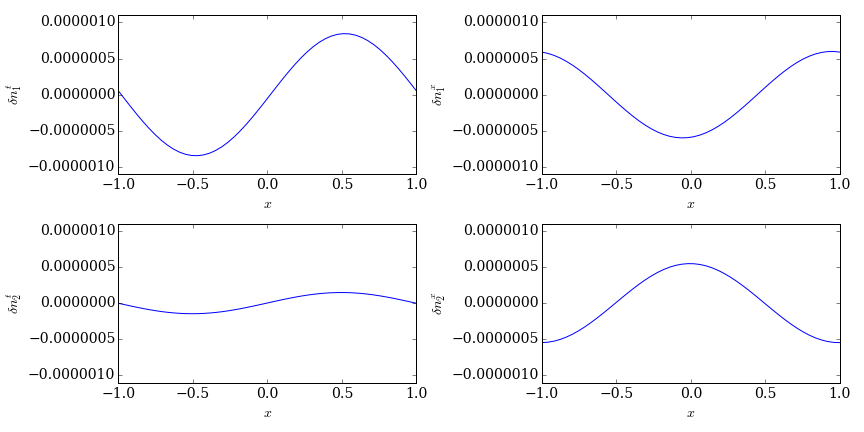
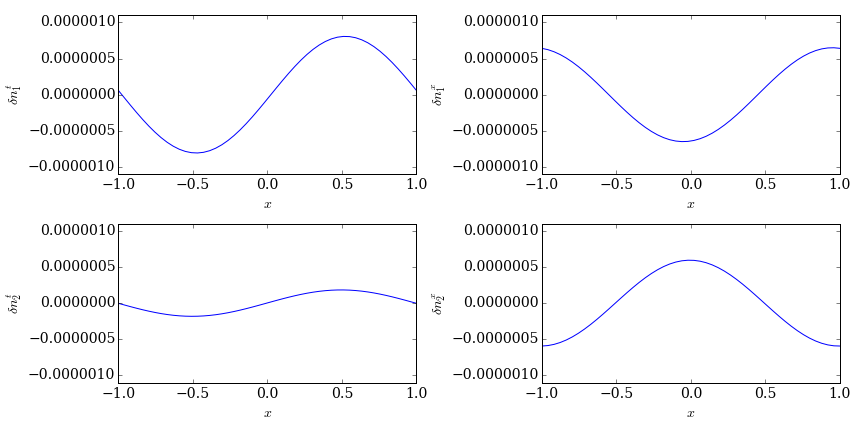
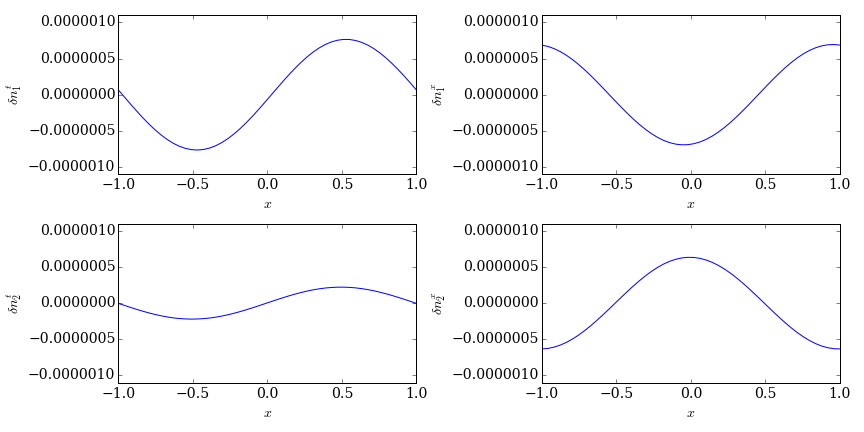
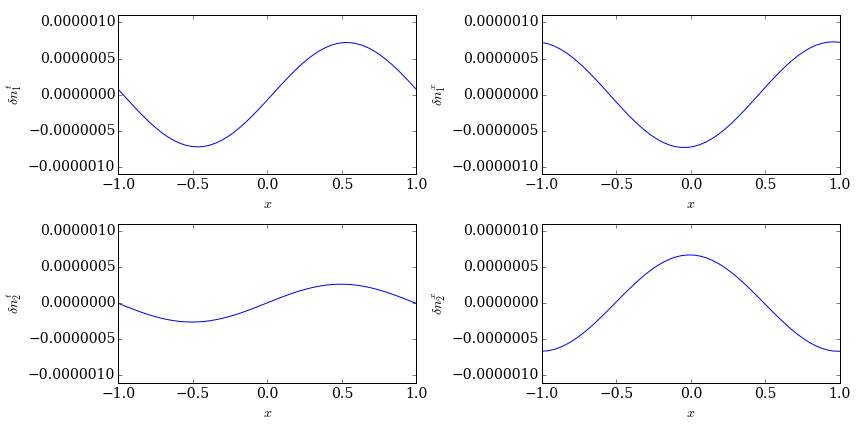
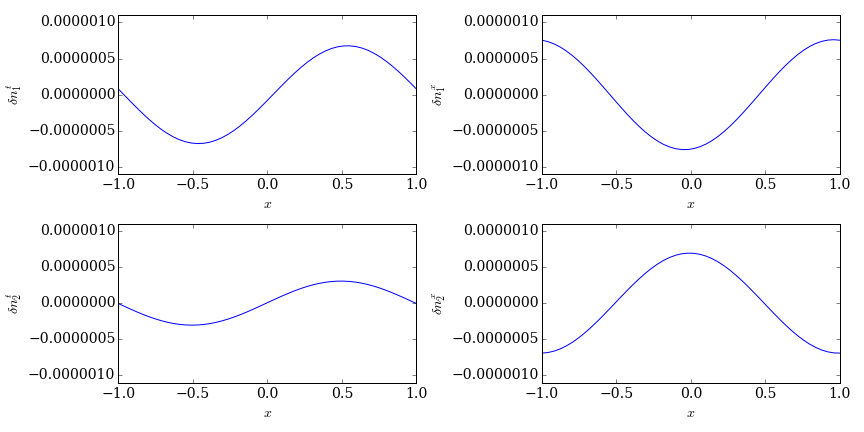
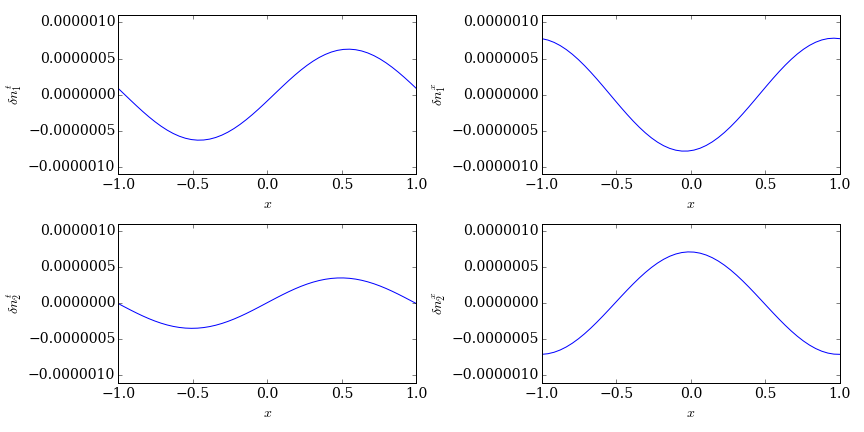
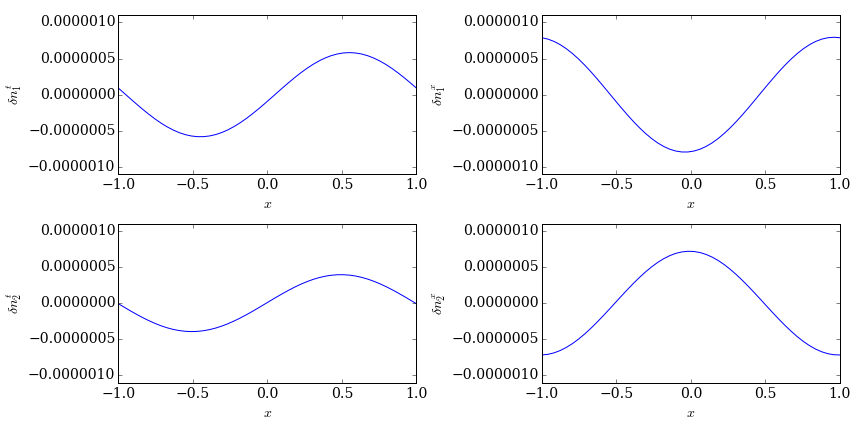
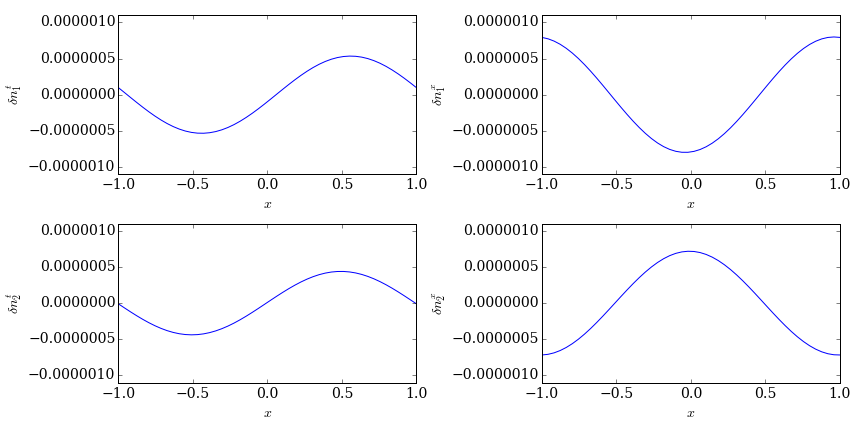
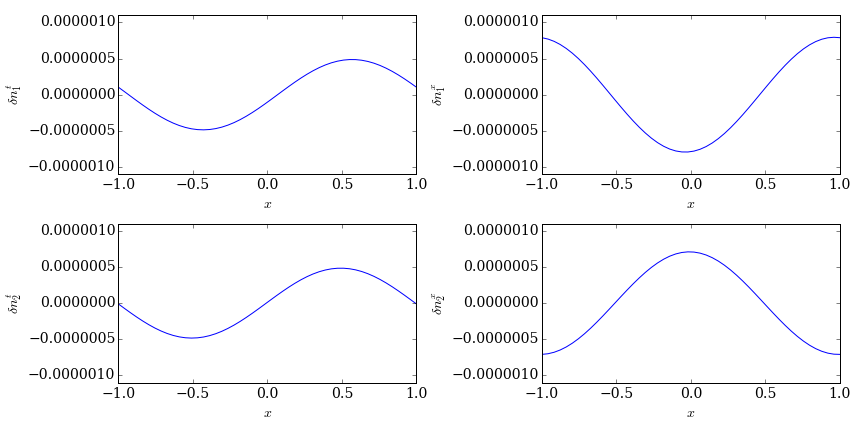
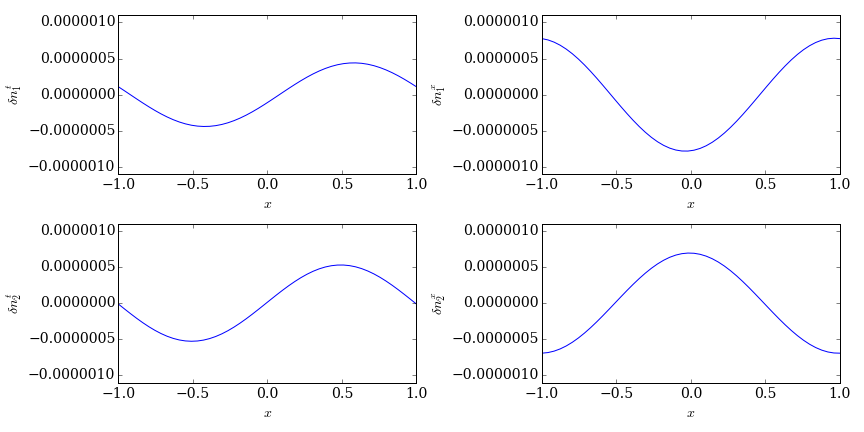
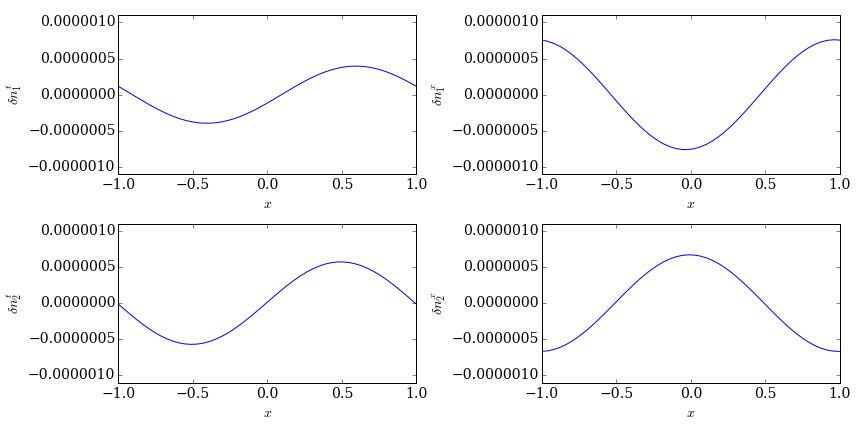
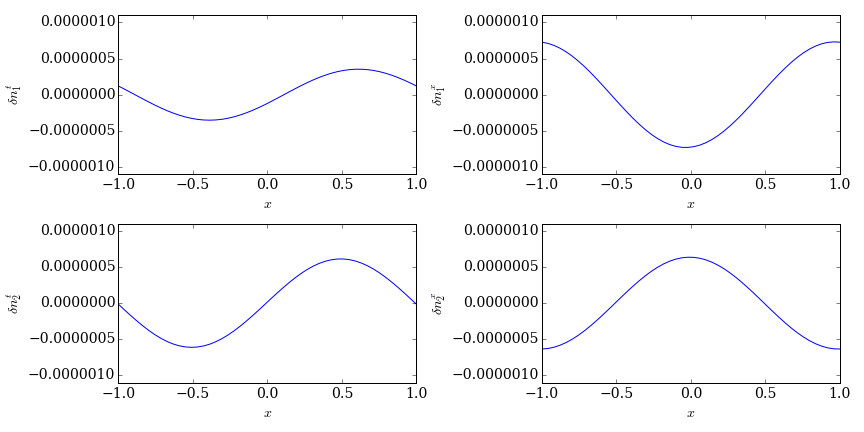
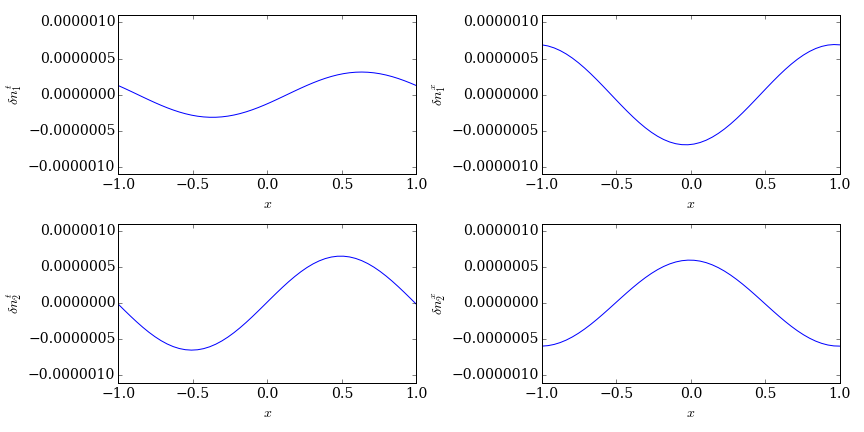
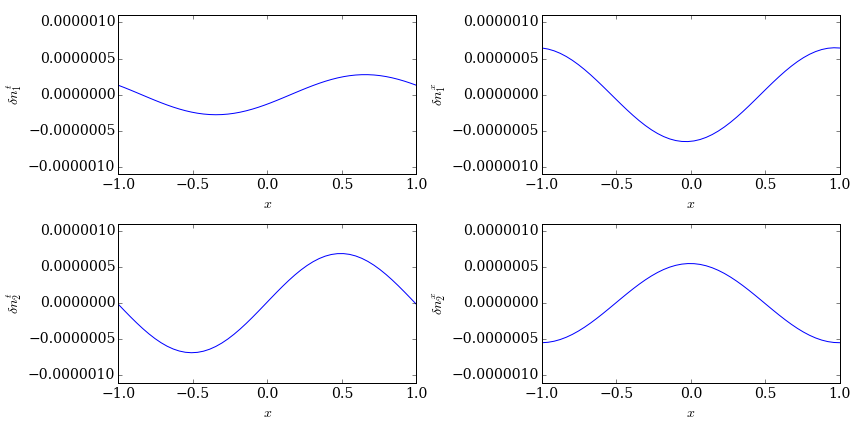
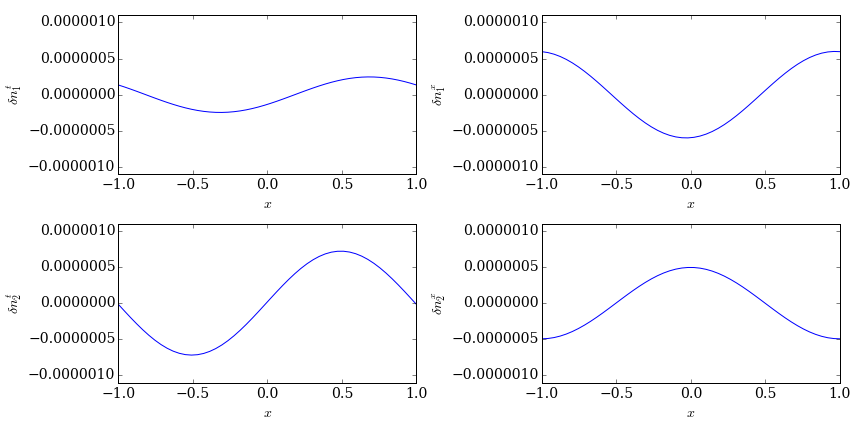
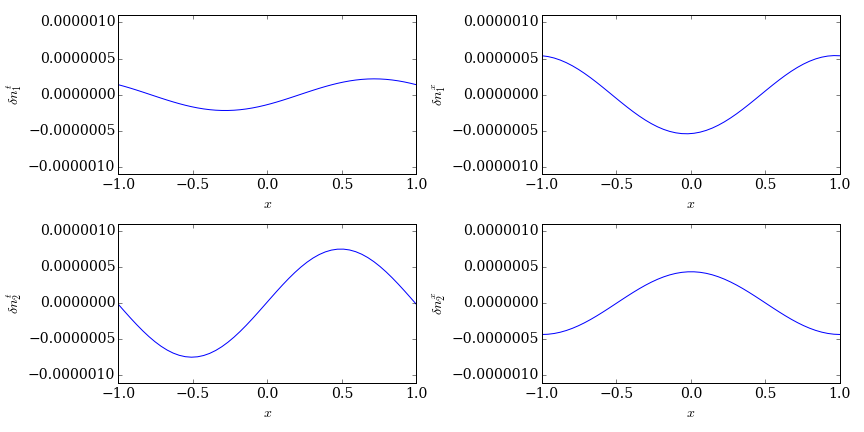
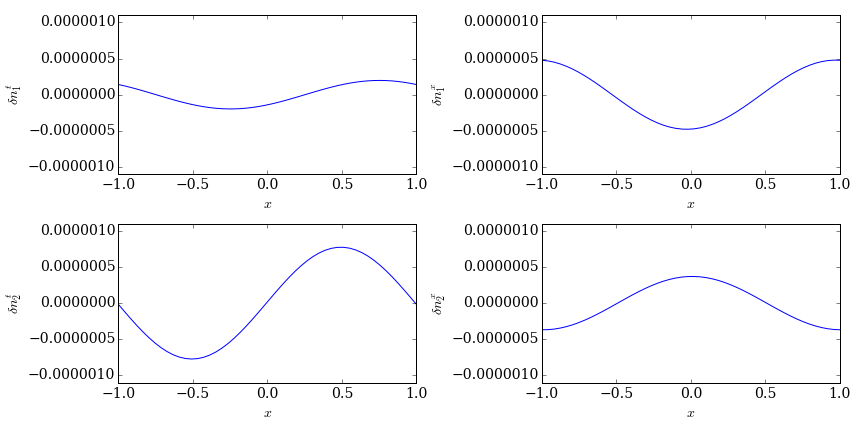
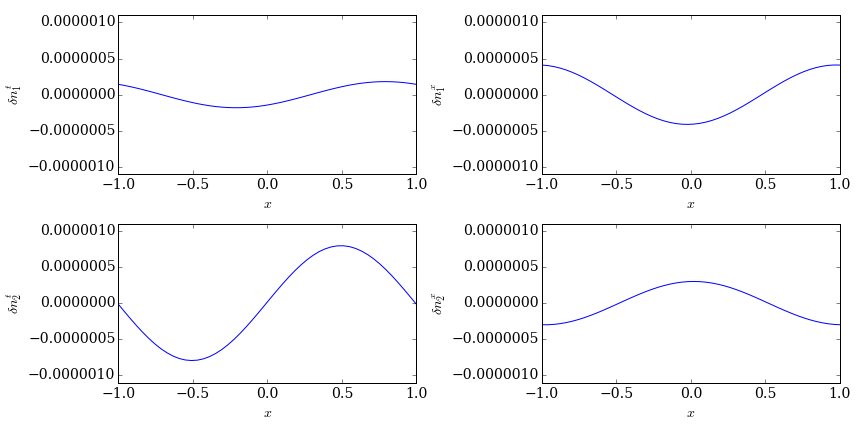
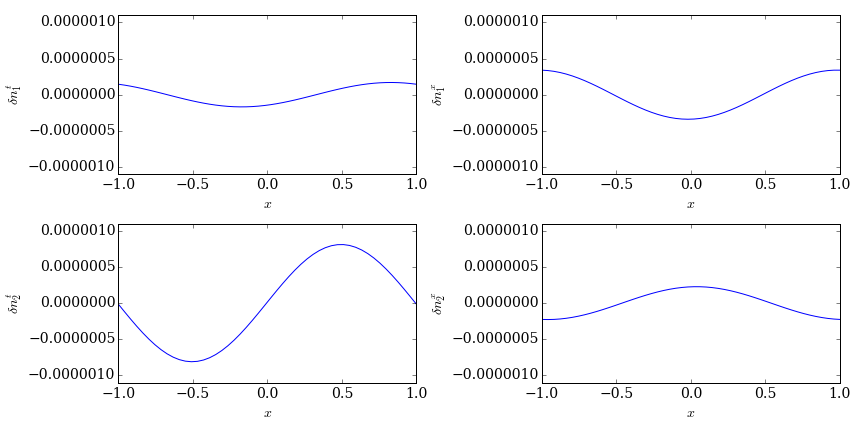
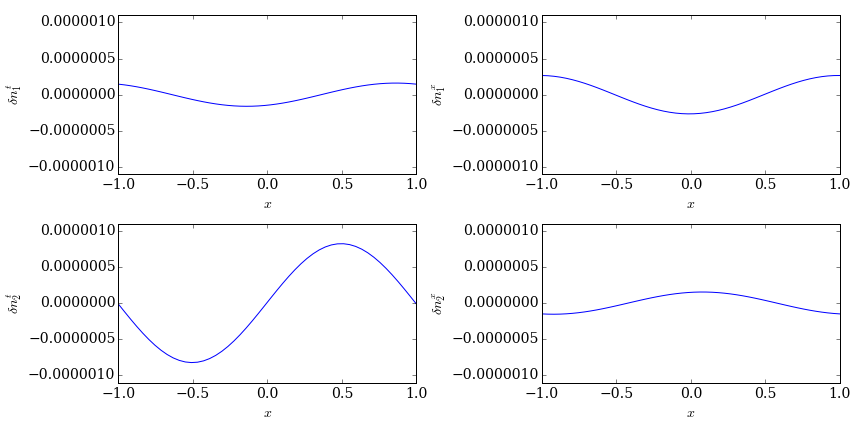
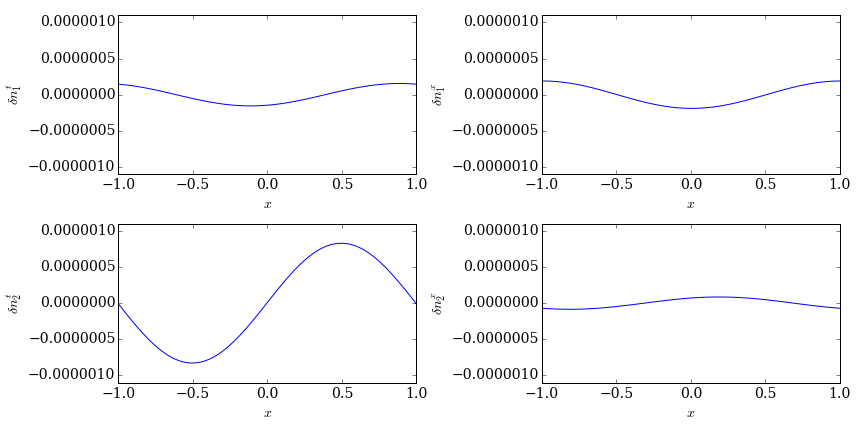
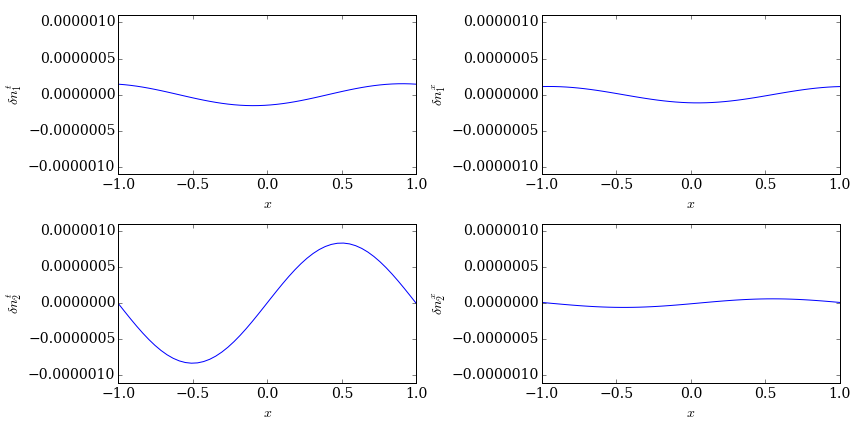
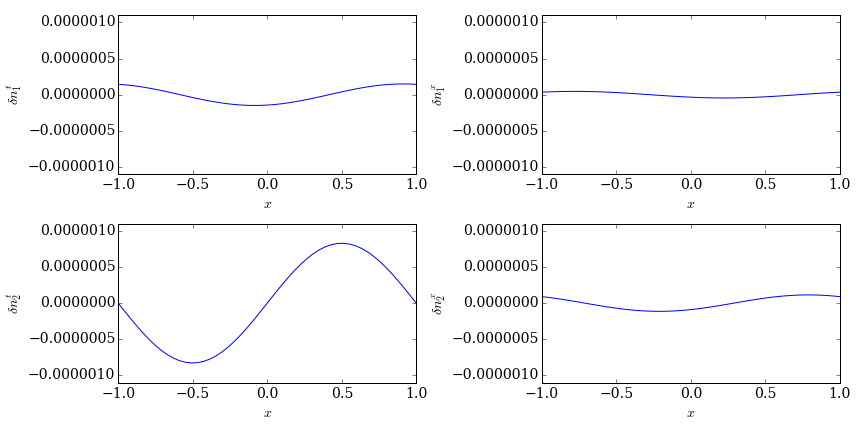
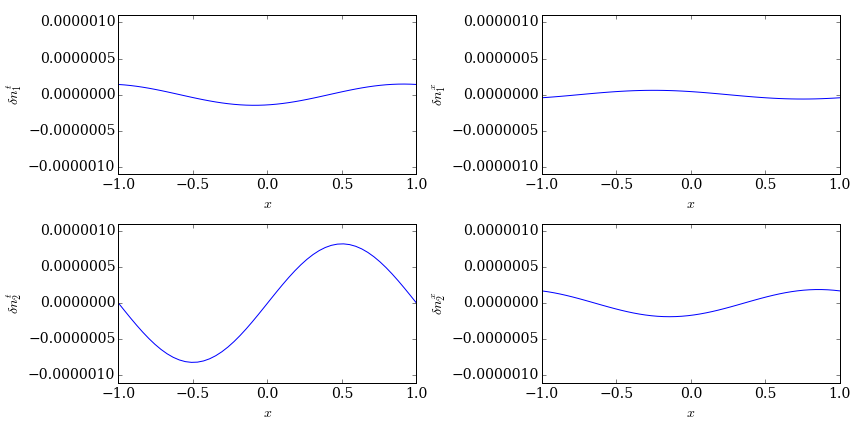
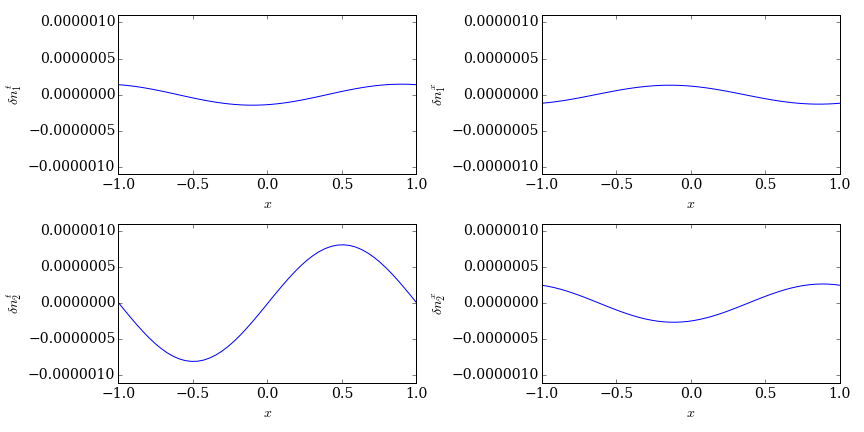
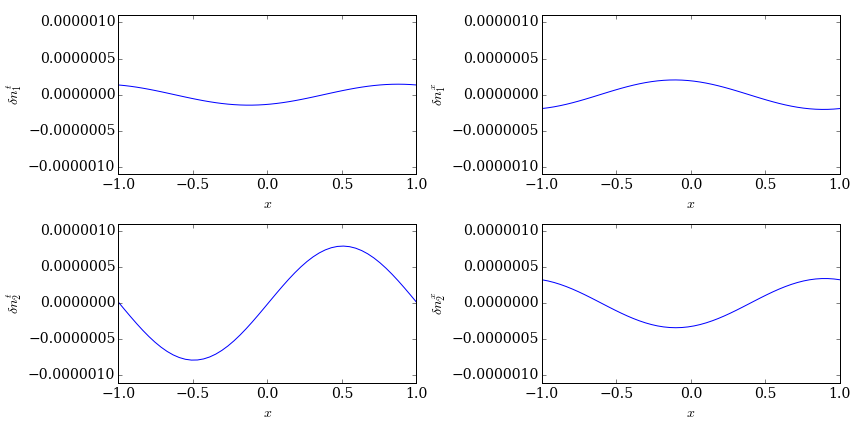
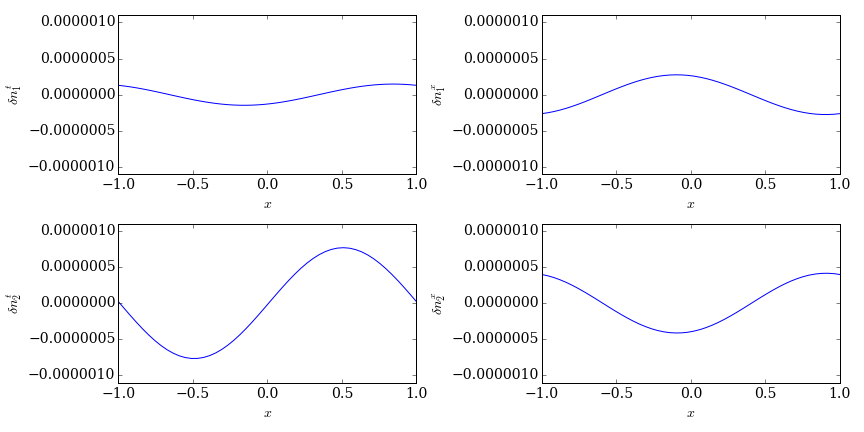
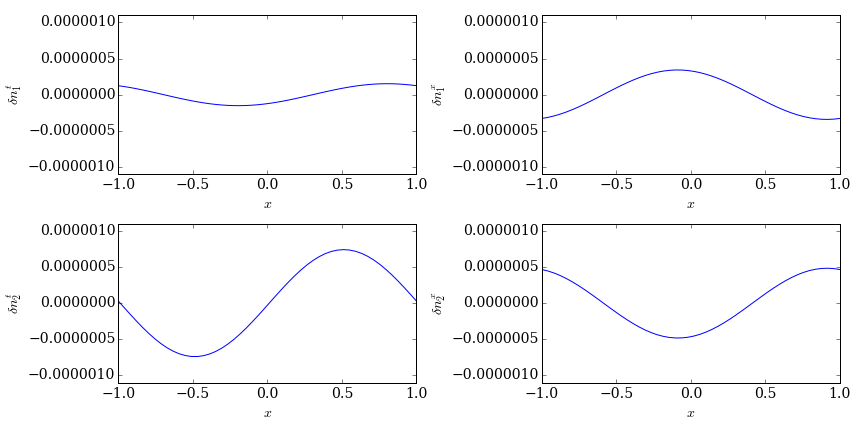
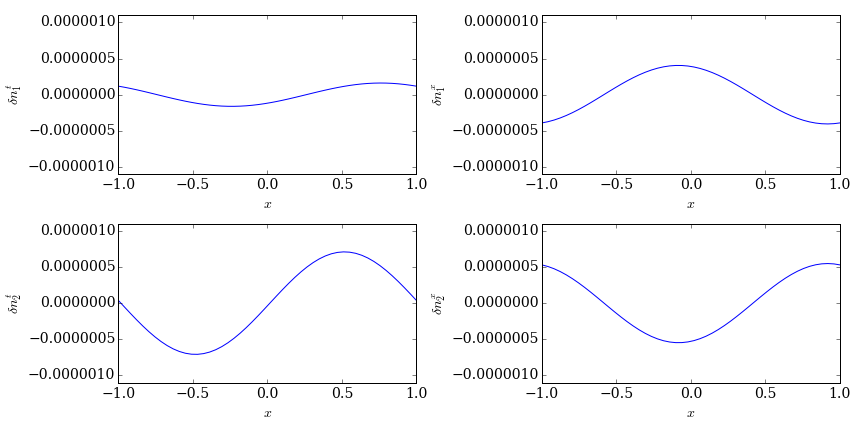
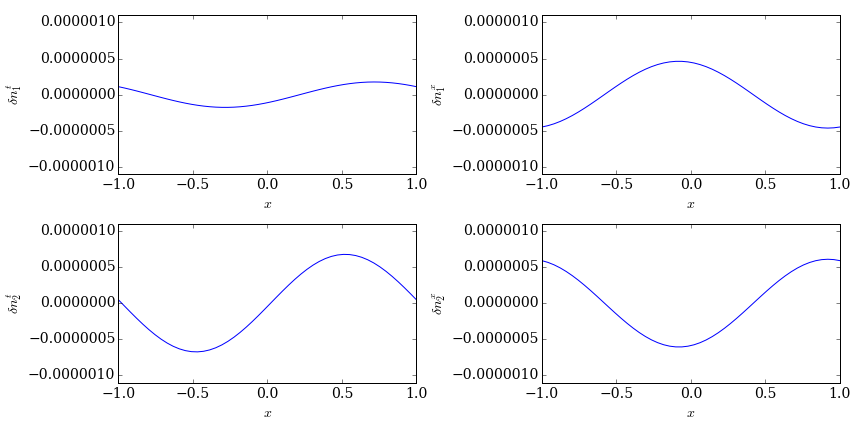
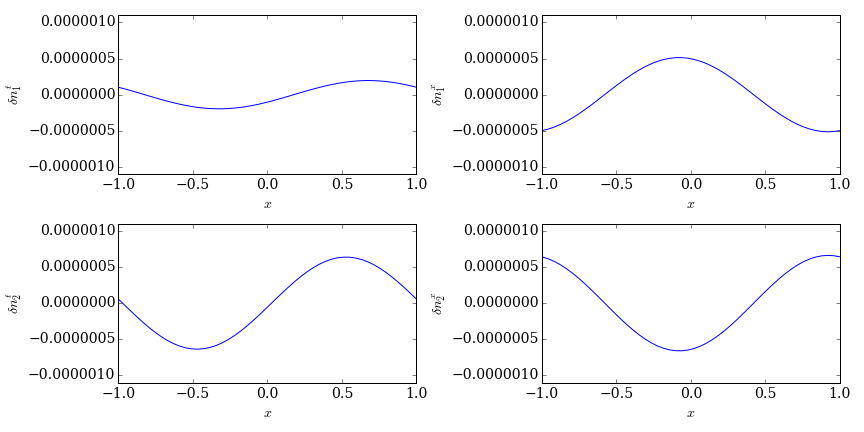
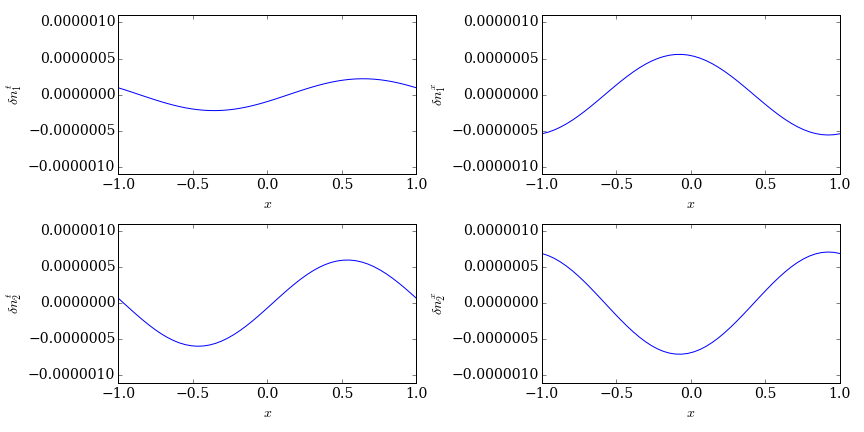
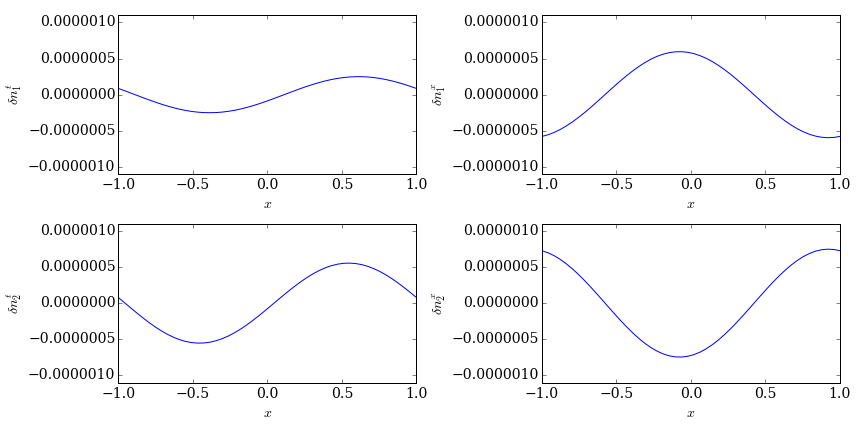
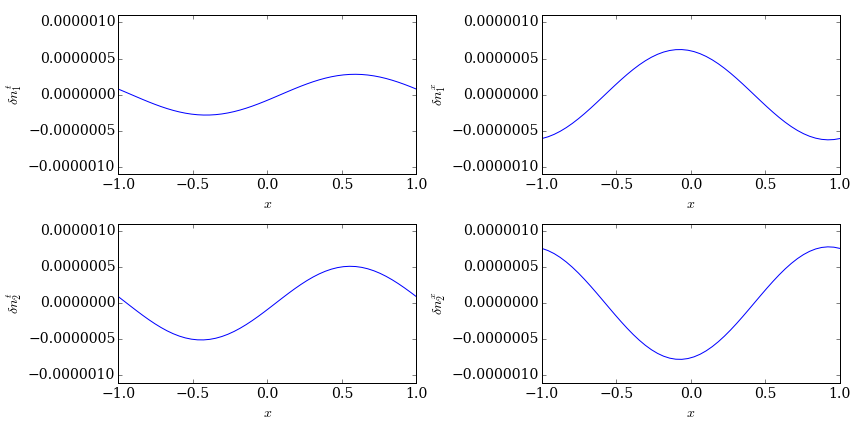
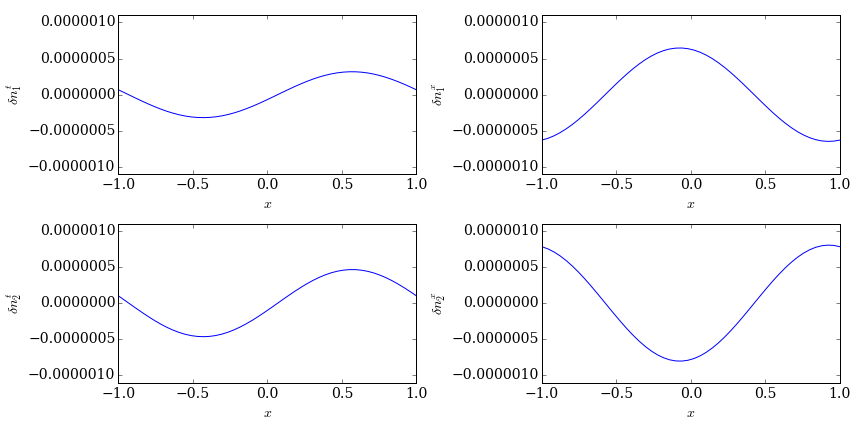
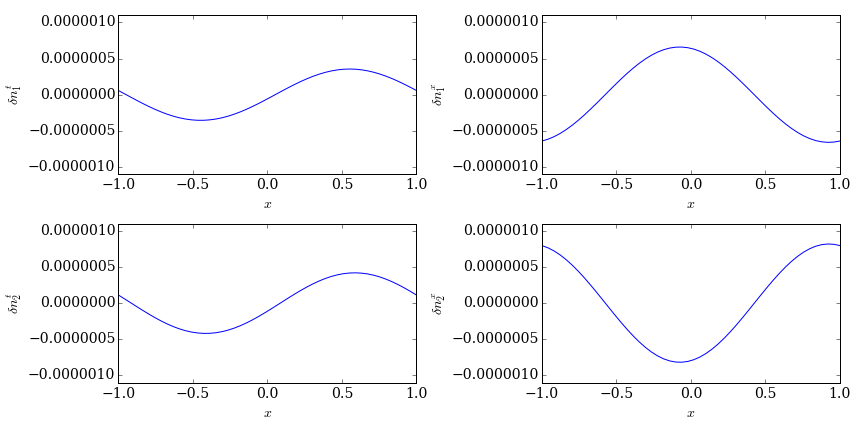
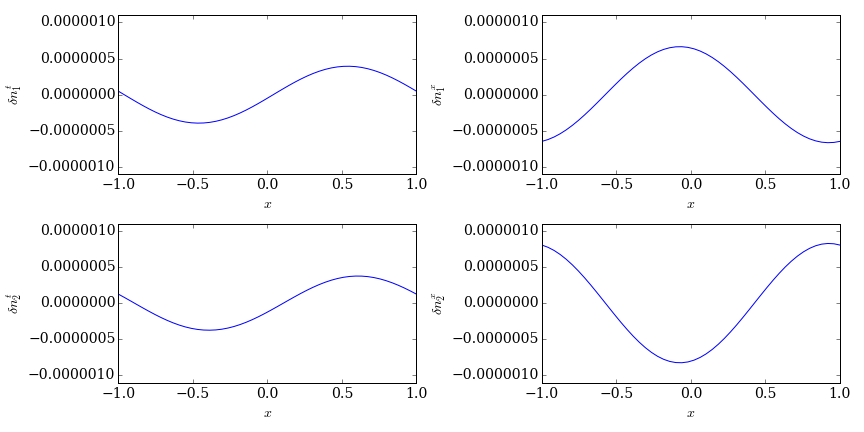
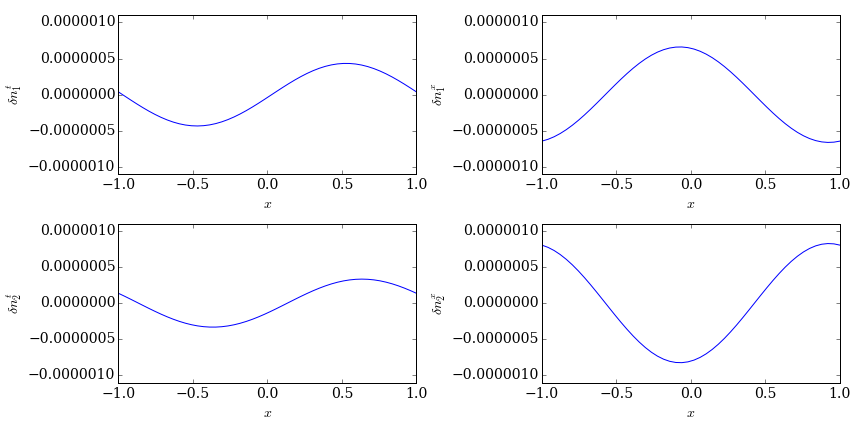
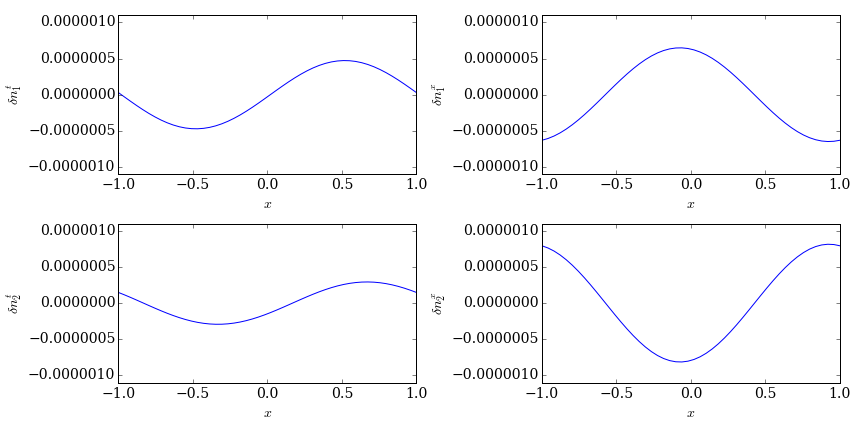
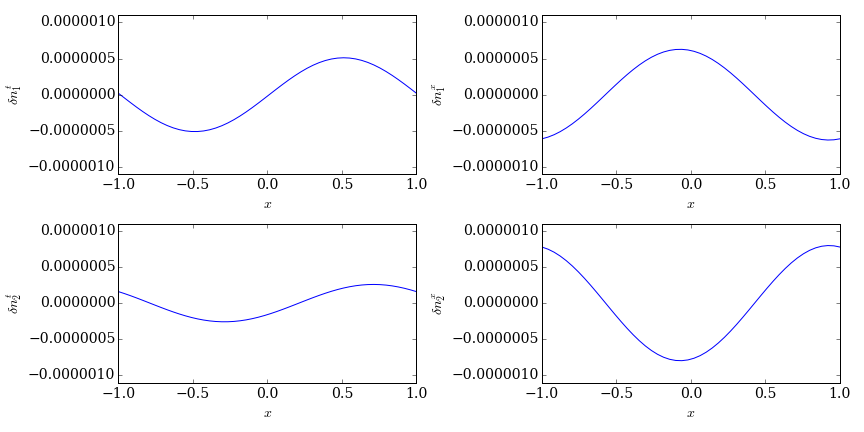
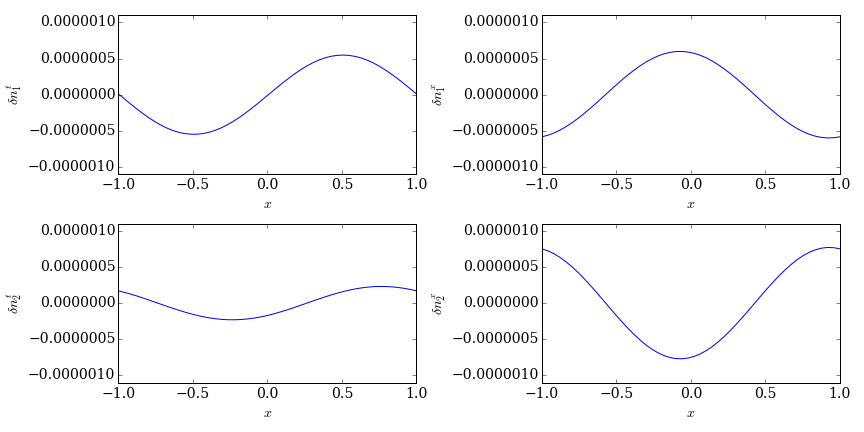
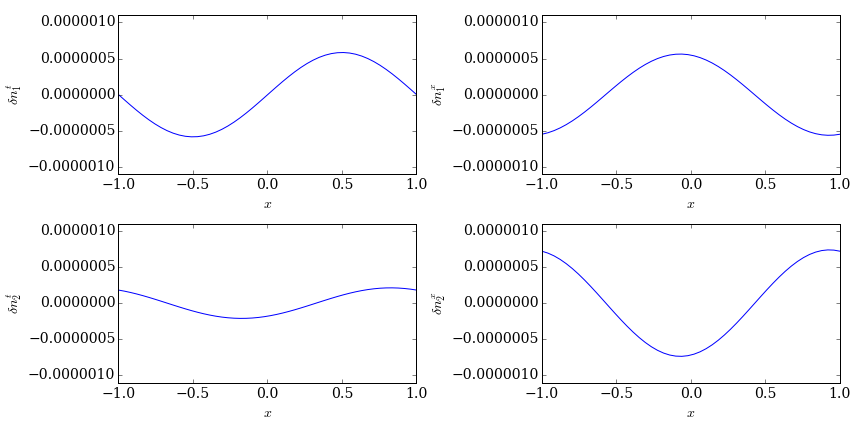
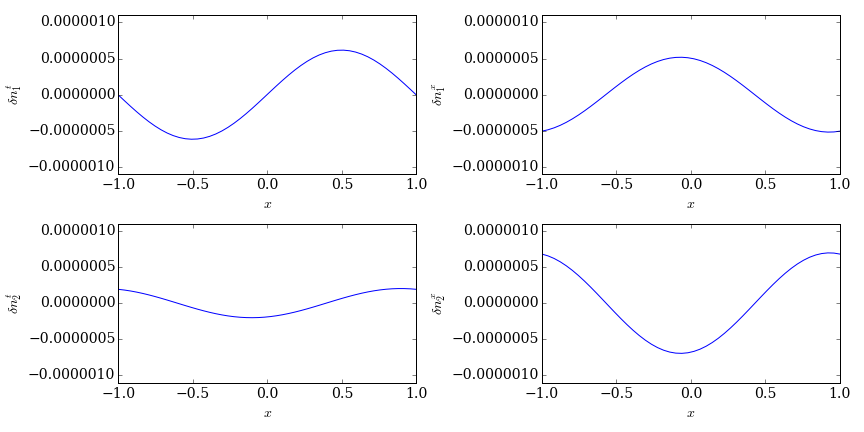

In [5]:
from JSAnimation import IPython_display
from matplotlib import animation

# Use JvdP's JSAnimation method
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
sol = []
xlabel = []
ylabel = []
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlim(-options_stable['L'], options_stable['L'])
    ax.set_ylim(-1.1*d_n, 1.1*d_n)
    sol.append(ax.plot([],[]))
    xlabel.append(ax.set_xlabel(""))
    ylabel.append(ax.set_ylabel(""))
fig.tight_layout()

def init():
    """Initialize animation."""
    print(sol)
    print(type(sol[0]))
    for [s] in sol:
        s.set_data([], [])
    for xl in xlabel:
        xl.set_text("")
    for yl in ylabel:
        yl.set_text("")

def update(n):
    """Update plot."""
    for [s], i in zip(sol, range(4)):
        s.set_data(x, delta_n_stable[n, i//2, i%2, :].reshape(len(x)))
    for xl in xlabel:
        xl.set_text("$x$")
    for yl, i in zip(ylabel, range(4)):
        yl.set_text("$\delta n_{{{}}}^{{{}}}$".format(i//2 + 1, 'tx'[i%2]))
    fig.tight_layout()

animation.FuncAnimation(fig, update, init_func = init, frames = len(t_stable), blit = True)

## Unstable solution

In [6]:
import EOS
import compute_perturbation as mf

# EOS options.
options_unstable = dict([('EOS_Derivatives', EOS.EOS_Paper), \
                         ('kappa', [0.5, 0.5])             , \
                         ('kappa_12', 0.0)                 , \
                         ('kappa_delta', 0.5)              , \
                         ('gamma', [1.6, 1.8])             , \
                         ('m', [1.0, 1.0])                 , \
                         ('sigma', [0.0, 0.0])])

# Domain
options_unstable['L'] = 1.0
options_unstable['a_max'] = 65

# Background
rho_bg = 1.0
v_bg1  = 0.0
W_bg1  = 1.0
v_bg2  = 0.6
W_bg2  = 1.0 / np.sqrt(1.0 - v_bg2**2)
options_unstable['n_bg'] = np.array([[rho_bg * W_bg1,  rho_bg * W_bg1 * v_bg1], \
                                     [rho_bg * W_bg2,  rho_bg * W_bg2 * v_bg2]])

# Perturbation - single sine wave
d_n = 1.0e-6
delta_nhat = np.zeros((options_unstable['a_max'], 2, 2), complex)
delta_nhat[1, 0, 0] = -0.5 * 1j * W_bg1 * d_n
delta_nhat[1, 0, 1] = -0.5 * 1j * W_bg1 * v_bg1 * d_n
# This part adds adjusted floating point noise.
# To be honest, the precise form of the noise is just due to how it was left after 
# I'd tried to fix a number of different errors; any noise should do.
for a in range(1,options_unstable['a_max']):
    omega_adj = np.pi * float(a) / (options_unstable['L'] * float(options_unstable['a_max']))
    adjustment = (8.0 * np.sin(omega_adj) - np.sin(2.0 * omega_adj)) / 6.0
    delta_nhat[a, :, :] += 5e-19 * 1j * adjustment / a
options_unstable['delta_nhat'] = delta_nhat

# Now set up the spacetime domain
t_unstable = np.linspace(0.0, 0.8, 51)

# Compute the linearized solution
delta_n_unstable = mf.calc_delta_n(t_unstable, x, options_unstable)

Animate the solution

[[<matplotlib.lines.Line2D object at 0x1089f0198>], [<matplotlib.lines.Line2D object at 0x1089f04e0>], [<matplotlib.lines.Line2D object at 0x1089f0d68>], [<matplotlib.lines.Line2D object at 0x1089f7630>]]
<class 'list'>



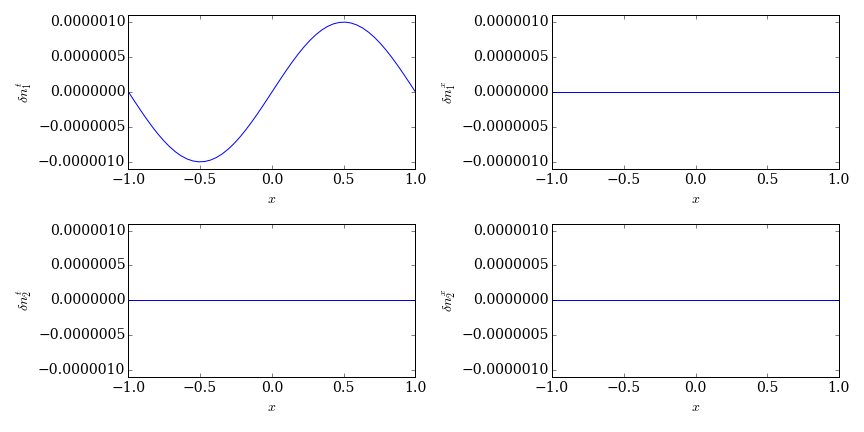
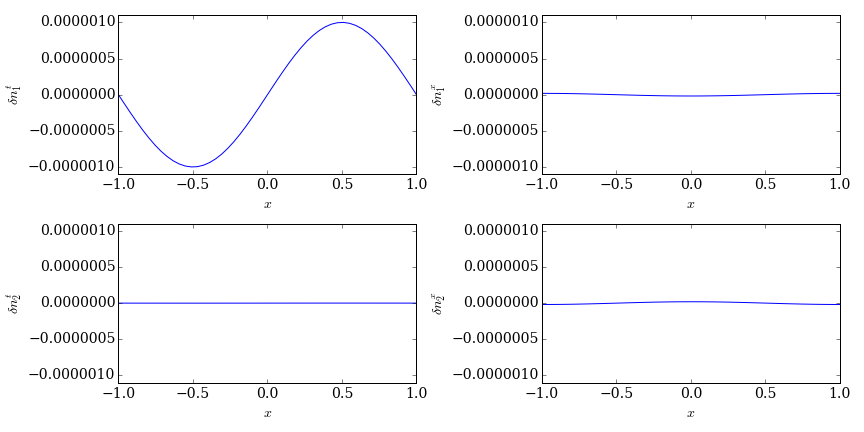
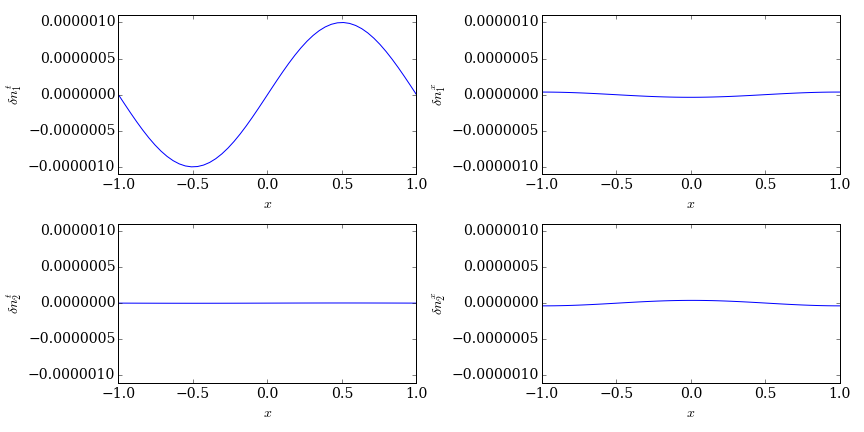
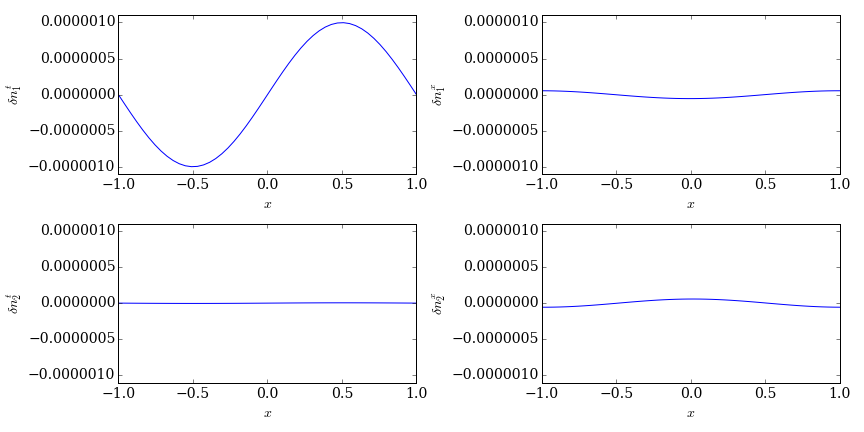
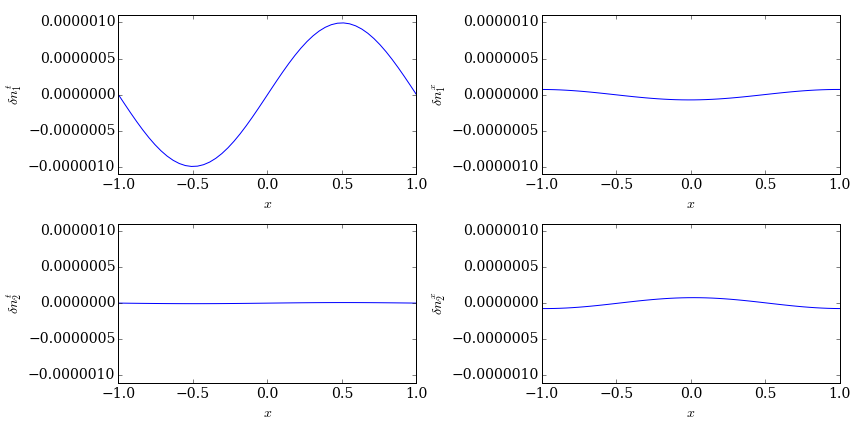
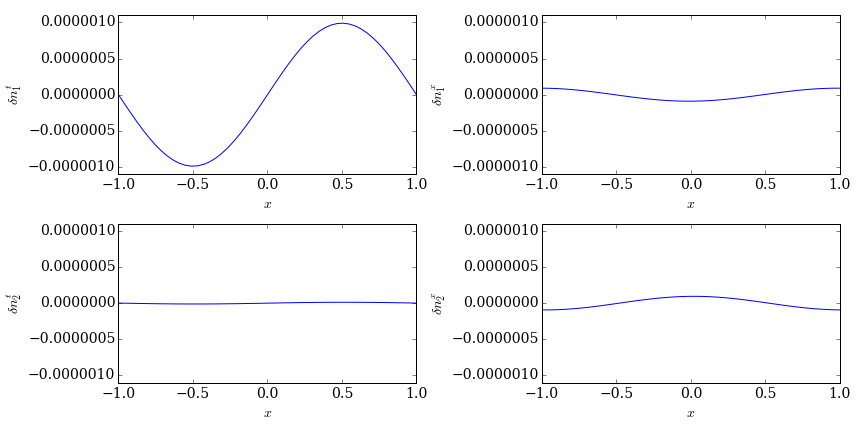
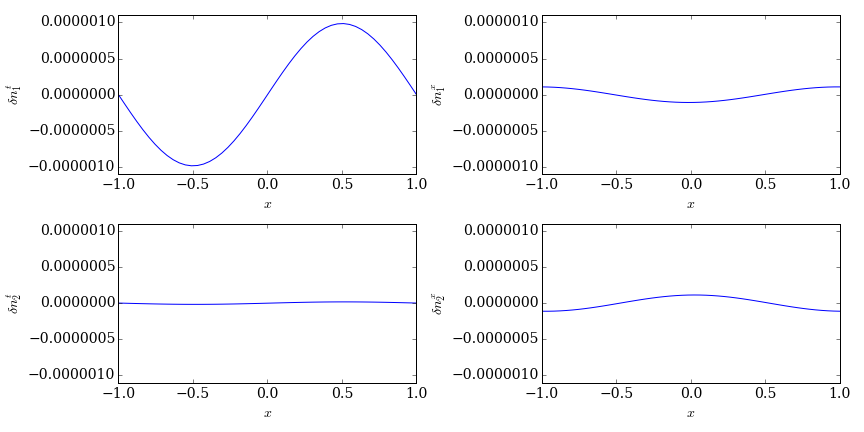
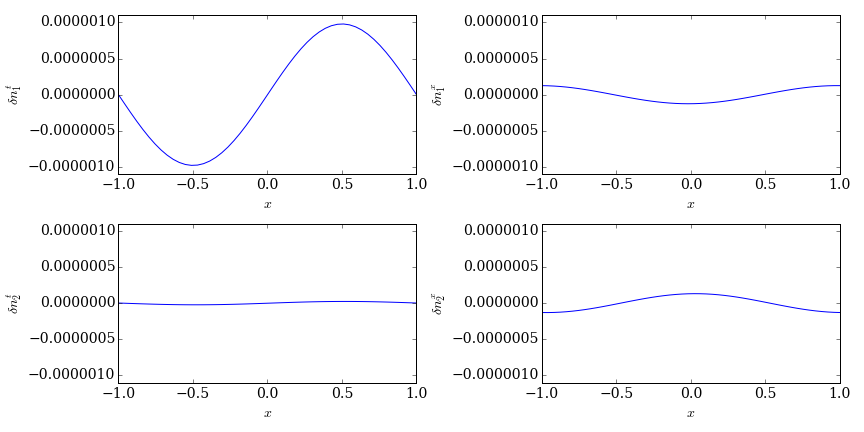
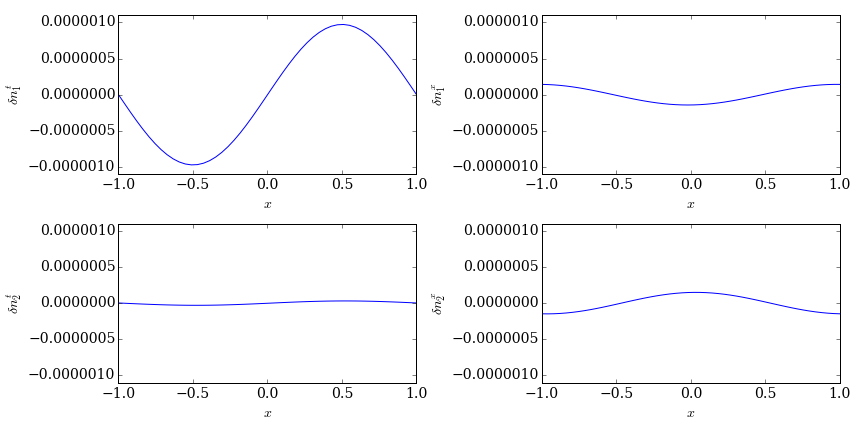
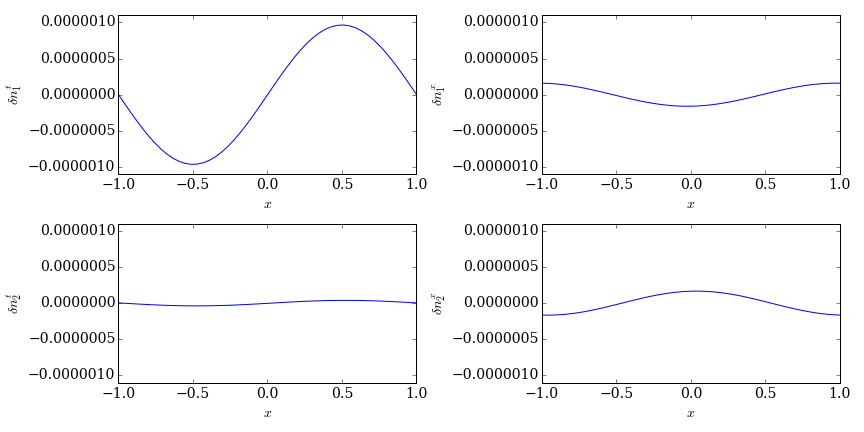
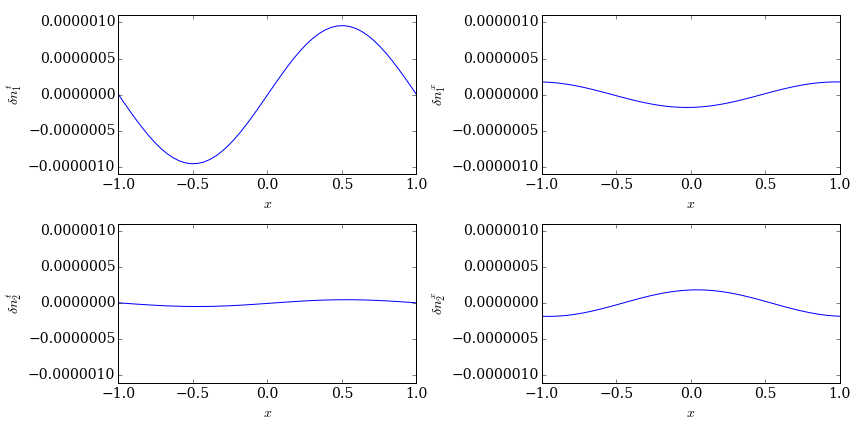
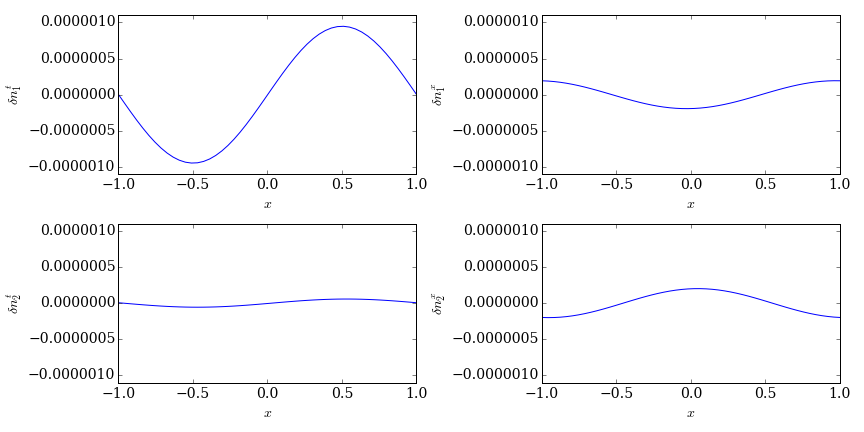
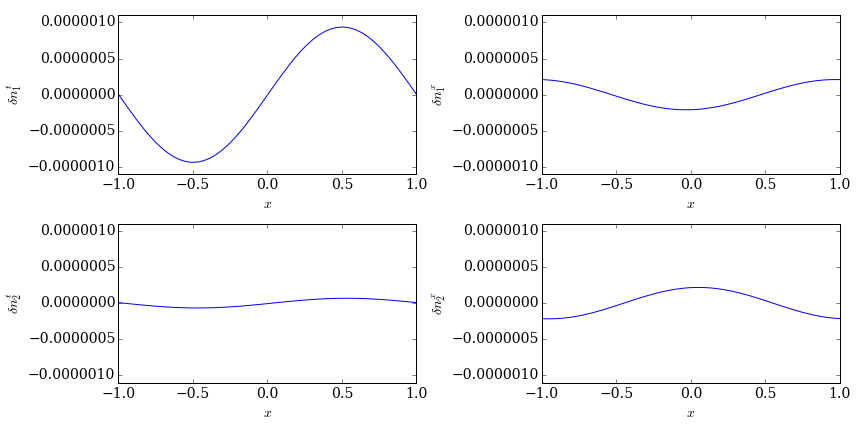
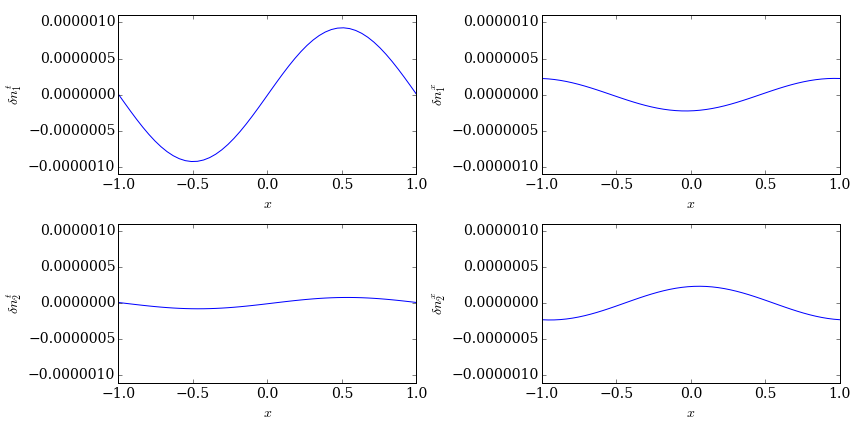
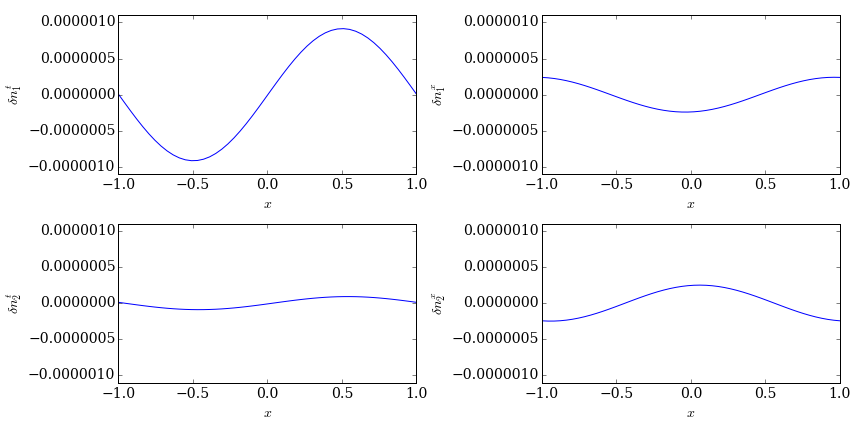
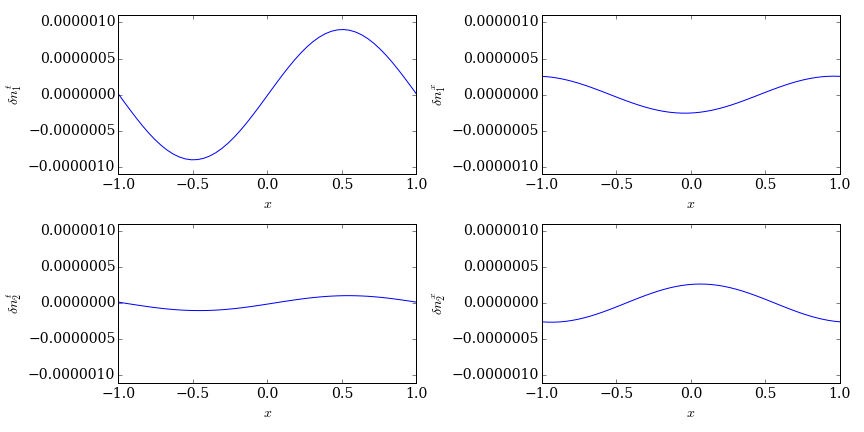
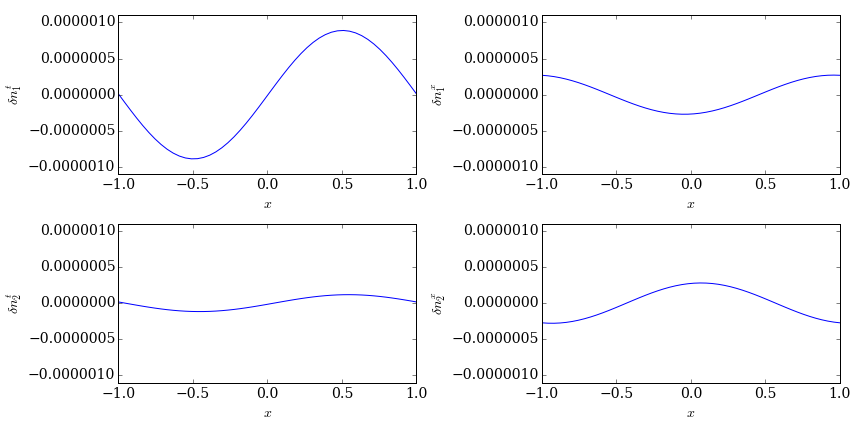
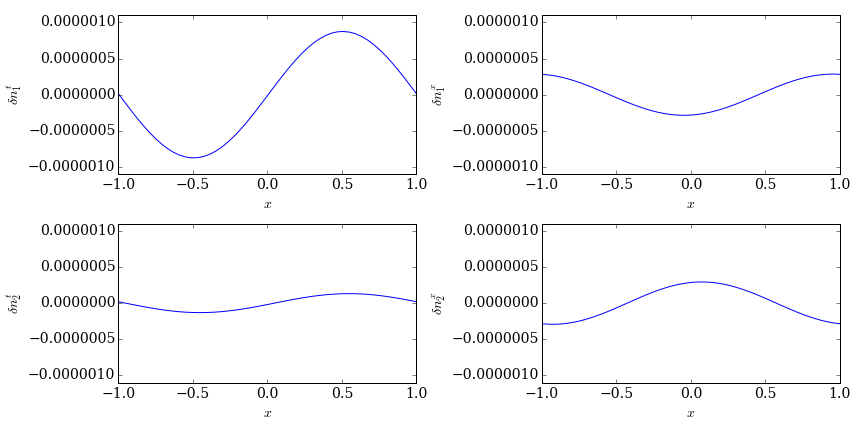
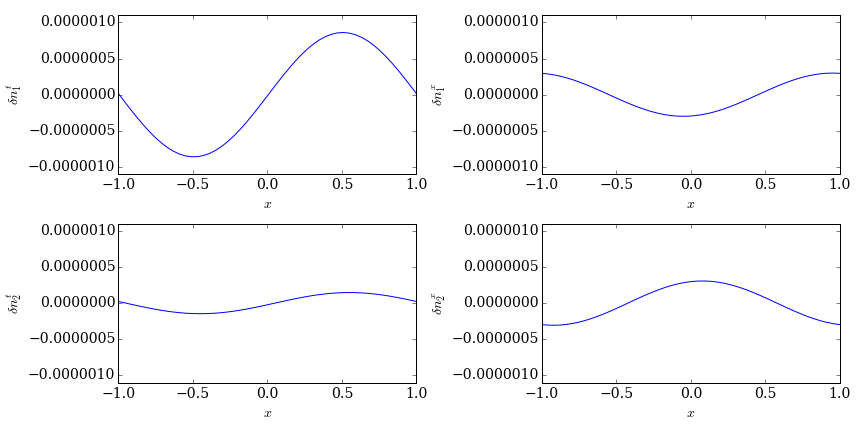
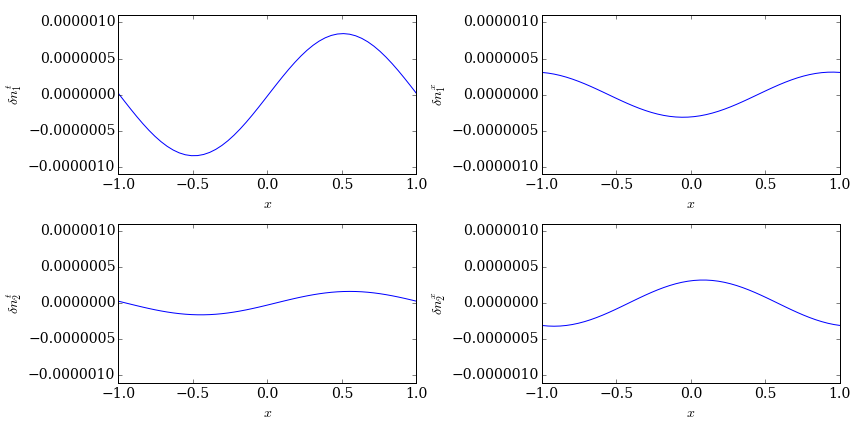
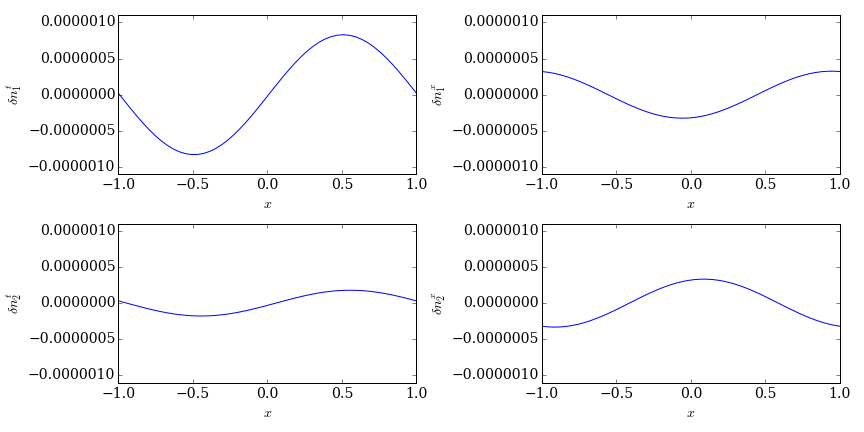
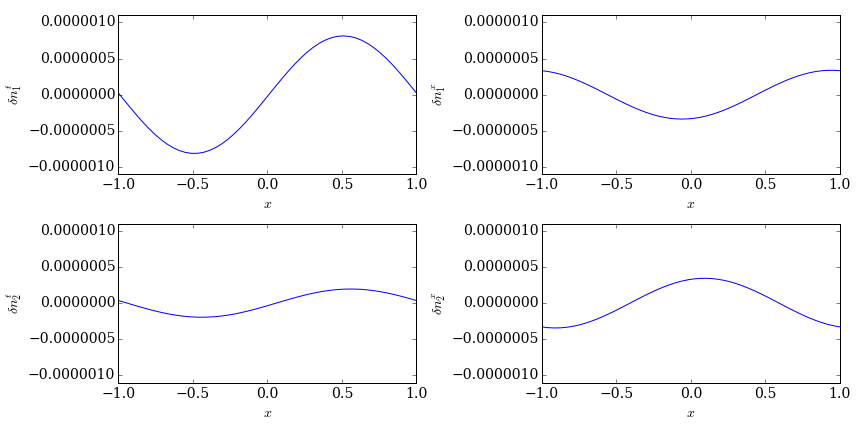
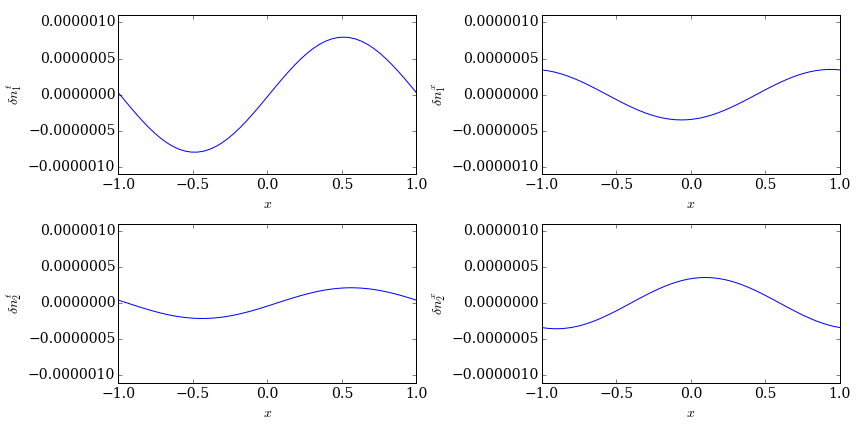
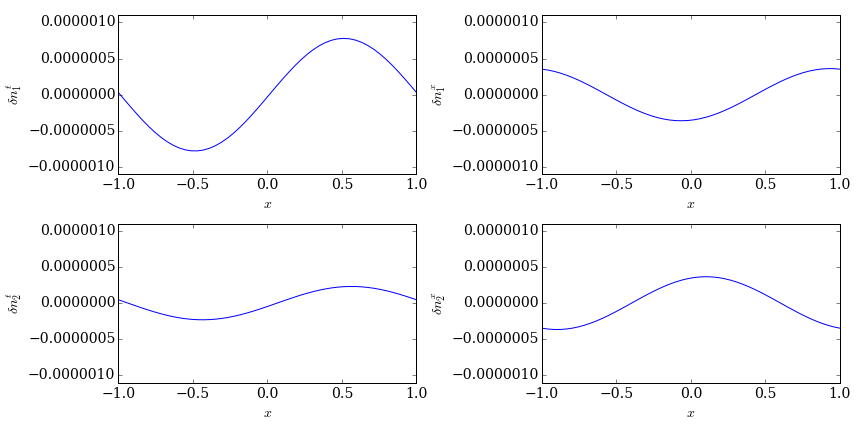
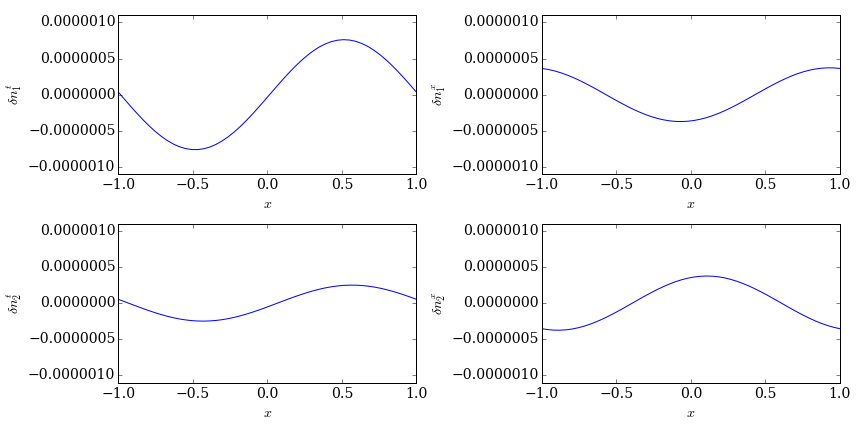
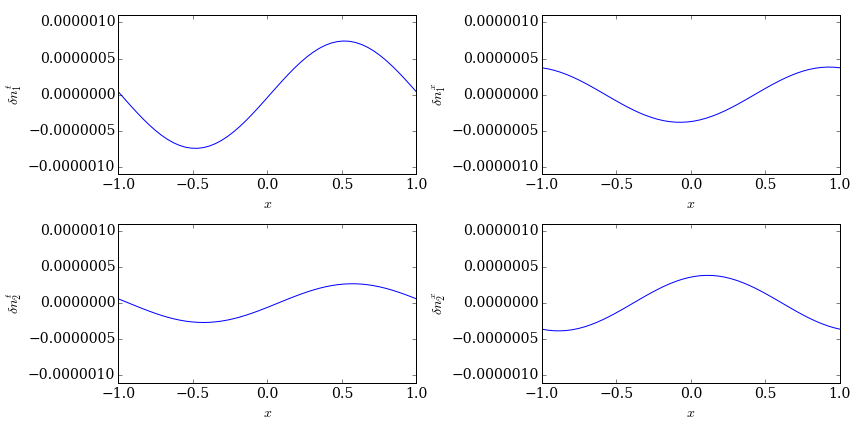
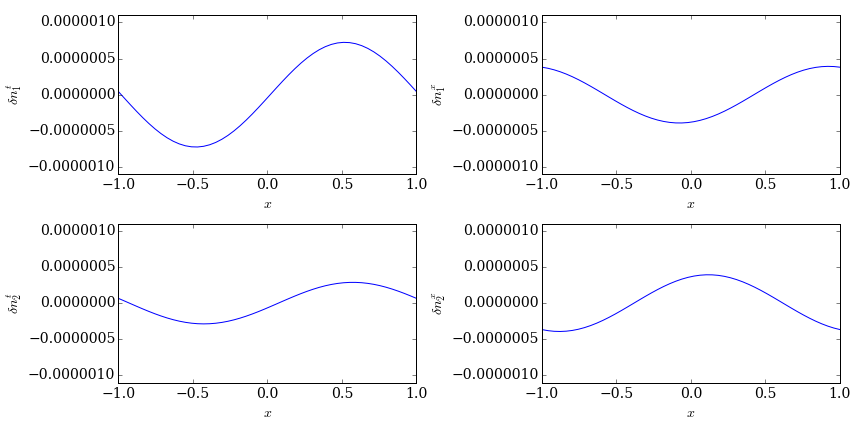
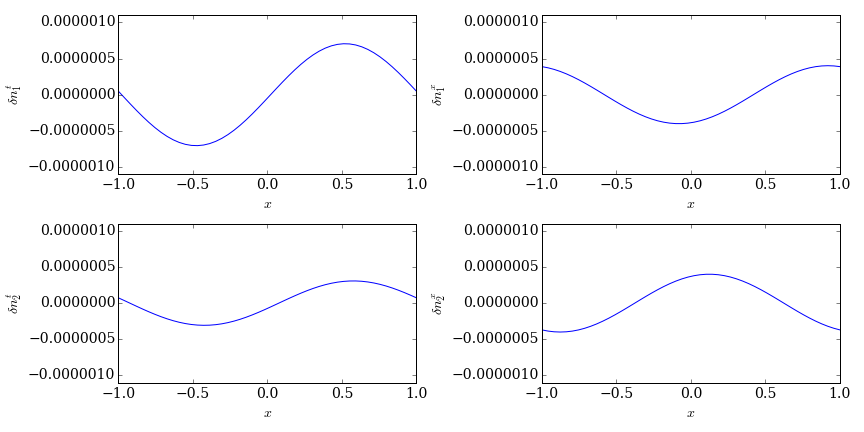
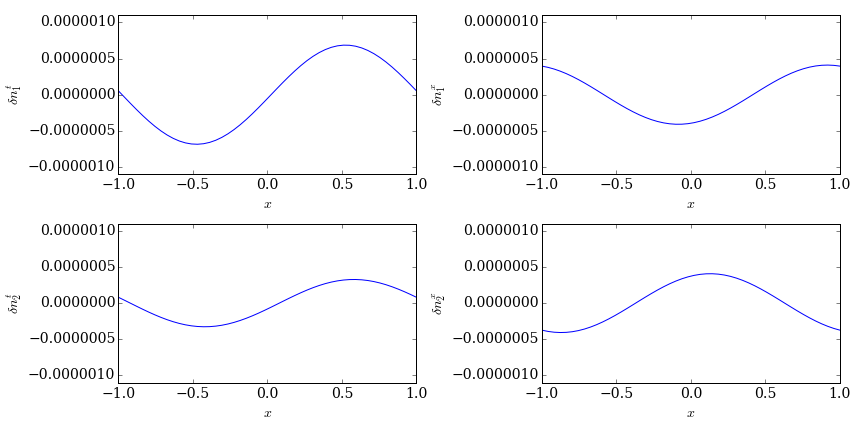
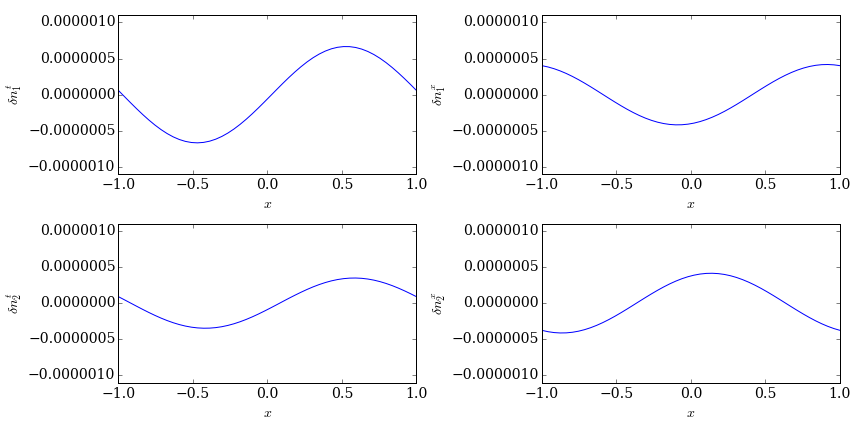
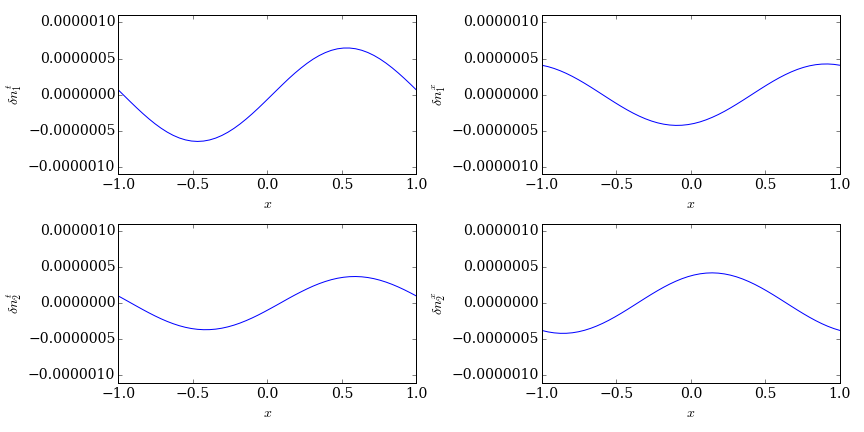
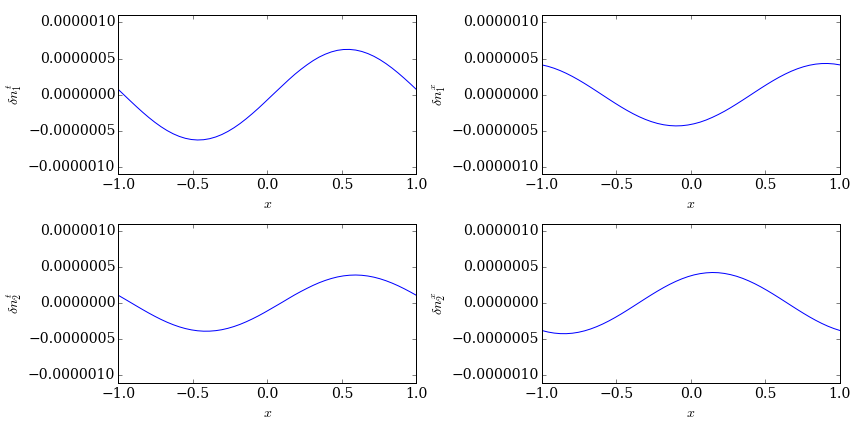
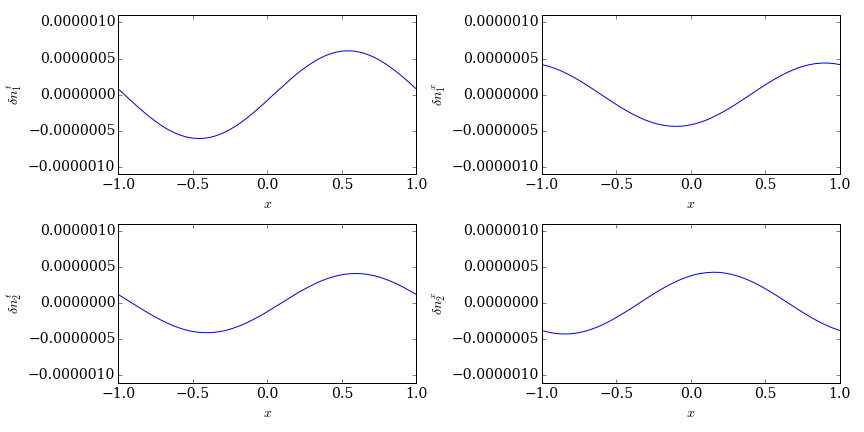
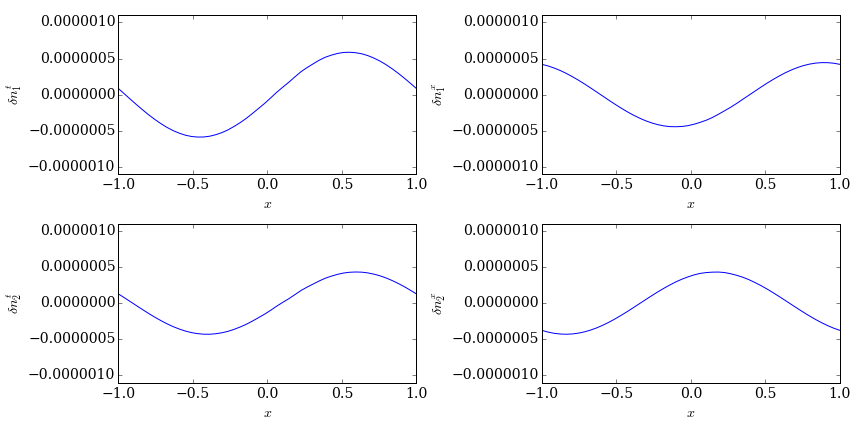
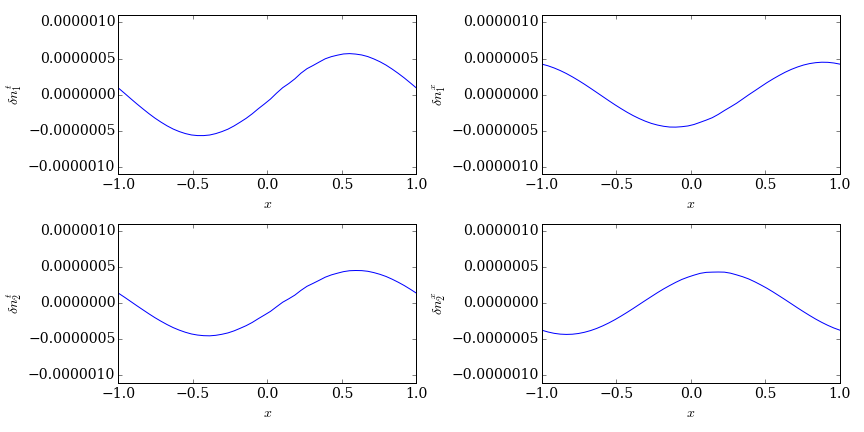
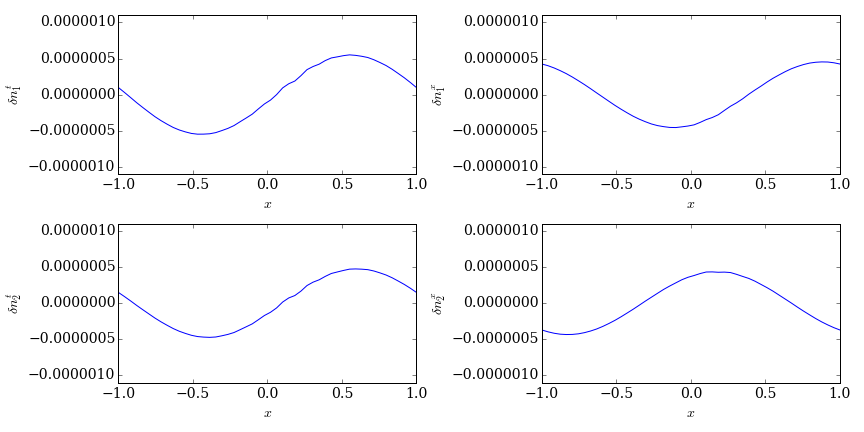
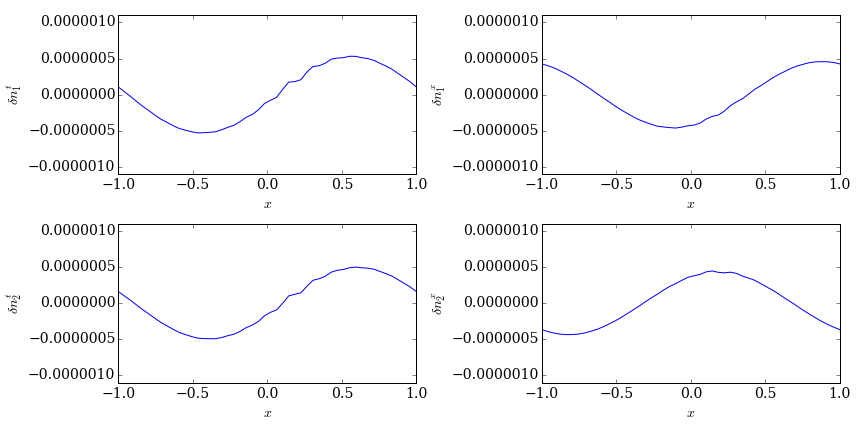
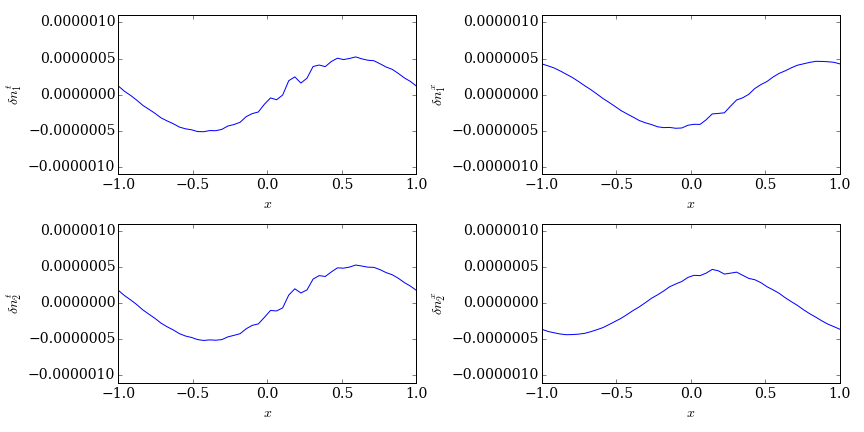
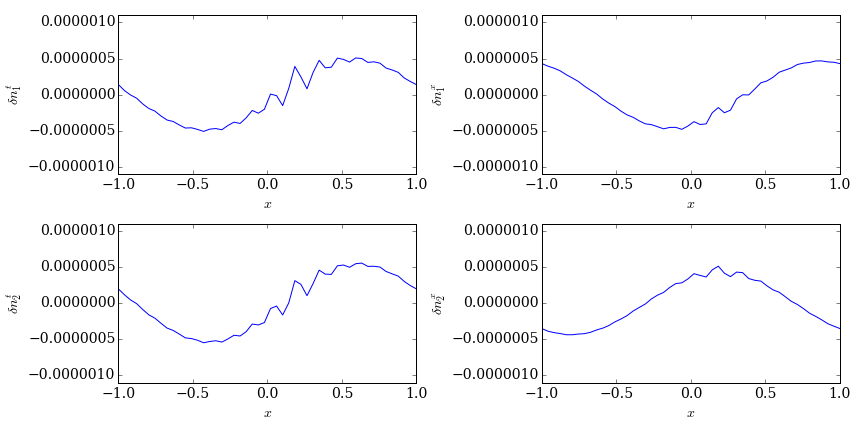
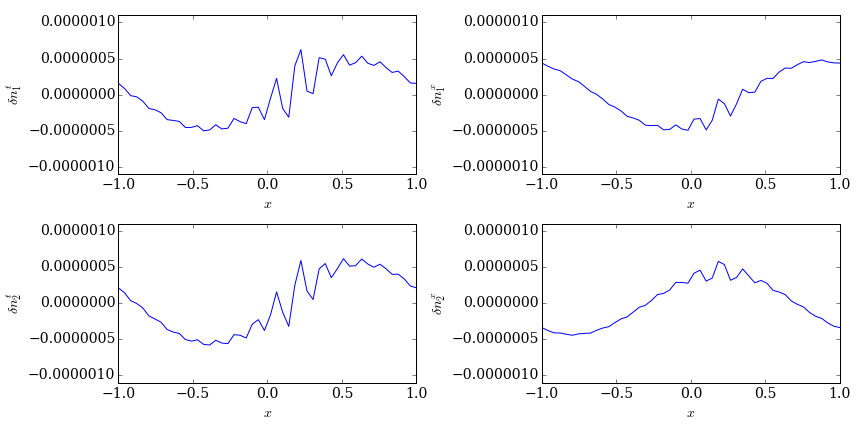
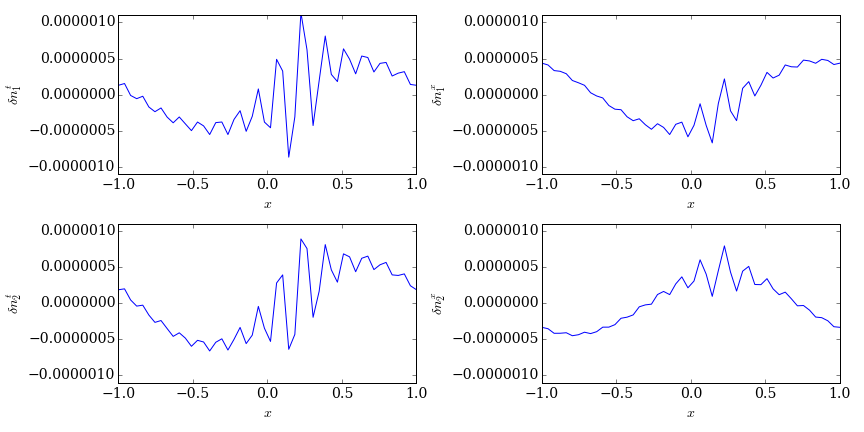
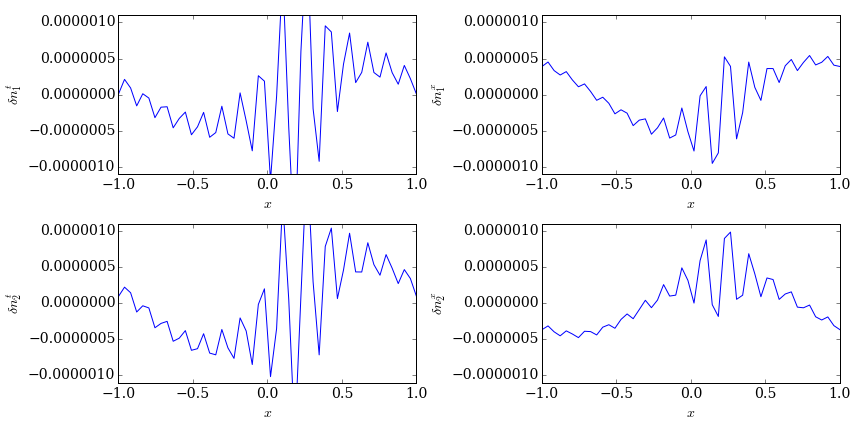
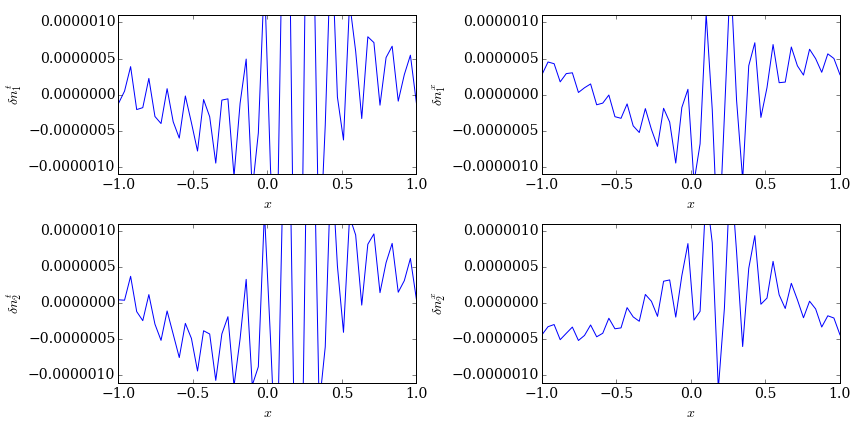
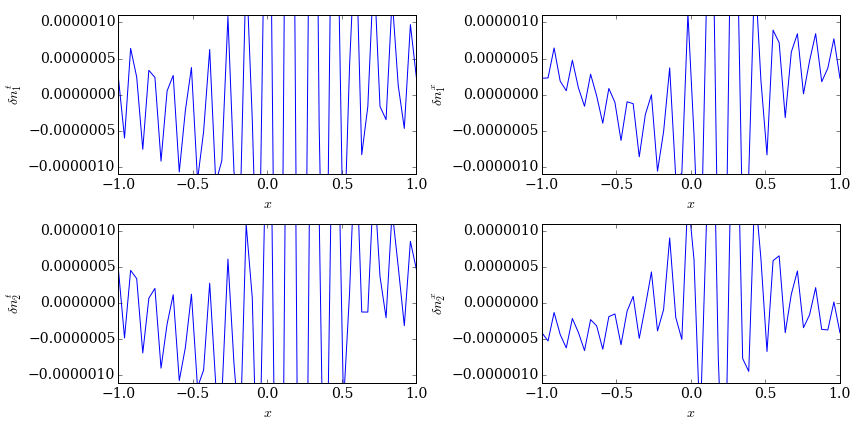
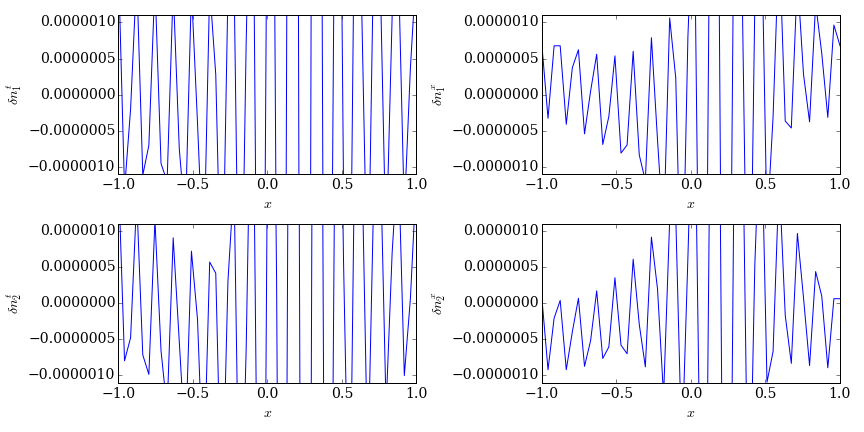
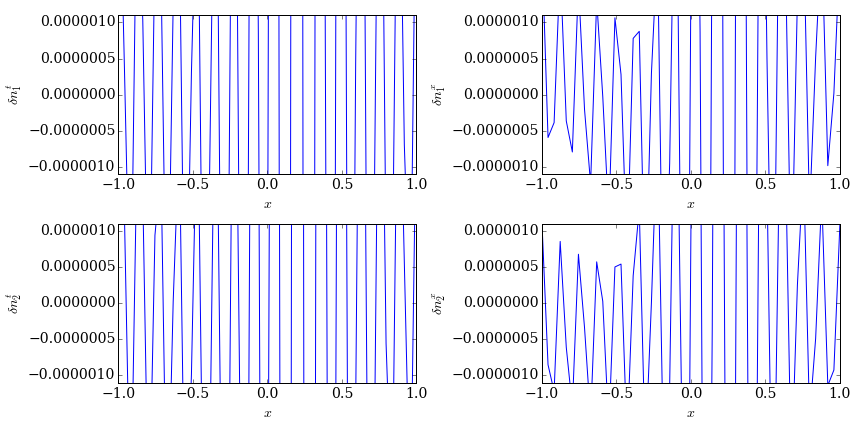
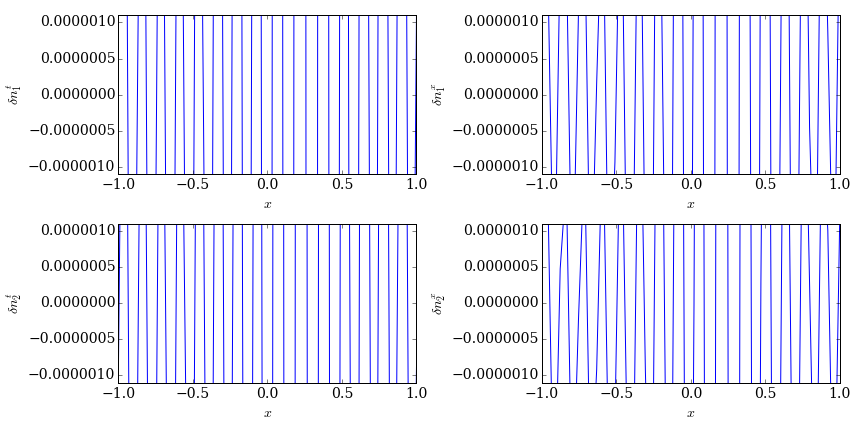
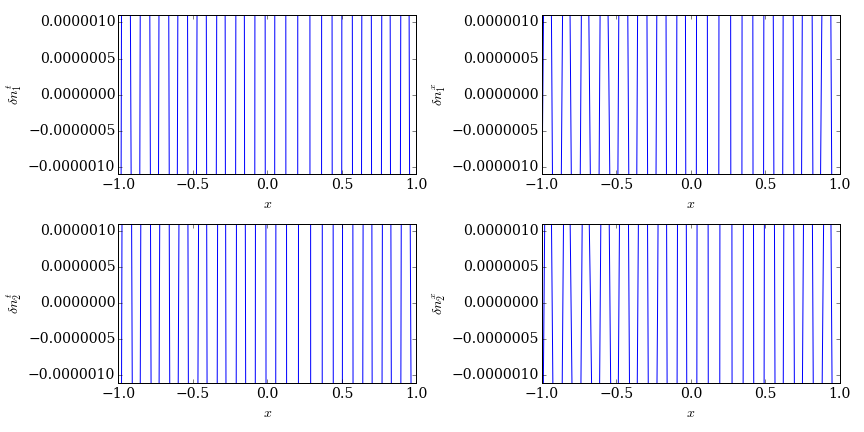
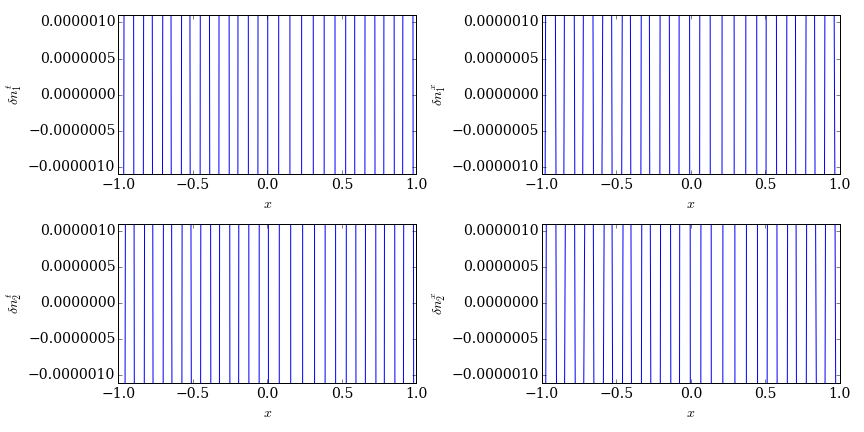
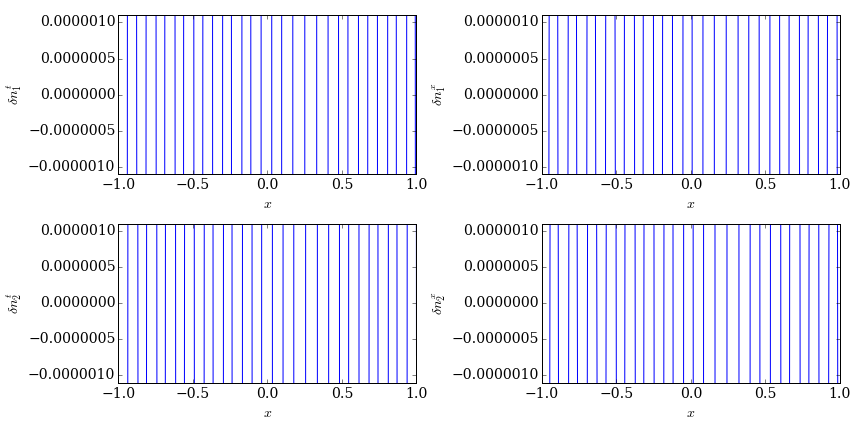
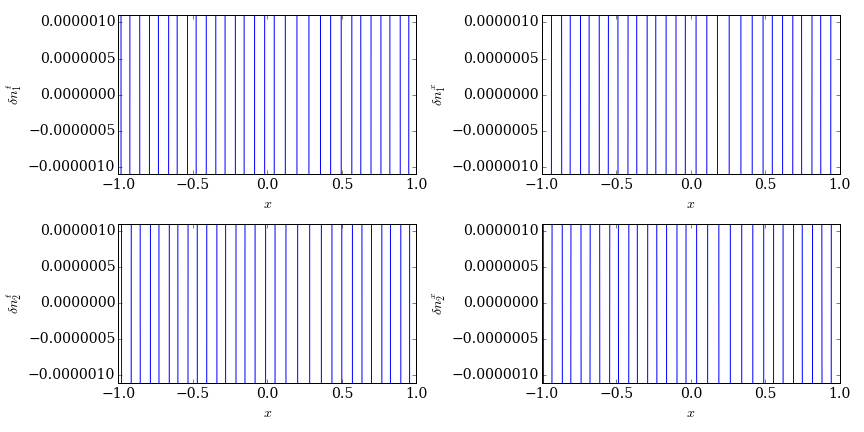

In [7]:
# Use JvdP's JSAnimation method
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
sol = []
xlabel = []
ylabel = []
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlim(-options_unstable['L'], options_unstable['L'])
    ax.set_ylim(-1.1*d_n, 1.1*d_n)
    sol.append(ax.plot([],[]))
    xlabel.append(ax.set_xlabel(""))
    ylabel.append(ax.set_ylabel(""))
fig.tight_layout()

def init():
    """Initialize animation."""
    print(sol)
    print(type(sol[0]))
    for [s] in sol:
        s.set_data([], [])
    for xl in xlabel:
        xl.set_text("")
    for yl in ylabel:
        yl.set_text("")
    fig.tight_layout()

def update(n):
    """Update plot."""
    for [s], i in zip(sol, range(4)):
        s.set_data(x, delta_n_unstable[n, i//2, i%2, :].reshape(len(x)))
    for xl in xlabel:
        xl.set_text("$x$")
    for yl, i in zip(ylabel, range(4)):
        yl.set_text("$\delta n_{{{}}}^{{{}}}$".format(i//2 + 1, 'tx'[i%2]))
    fig.tight_layout()

animation.FuncAnimation(fig, update, init_func = init, frames = len(t_unstable), blit = True)
    